# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

*"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered."*

Sérgio Moro and Raul M. S. Laureano Instituto Universitário de Lisboa (ISCTE – IUL). *USING DATA MINING FOR BANK DIRECT MARKETING: AN APPLICATION OF THE CRISP-DM METHODOLOGY*

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
from sklearn.exceptions import ConvergenceWarning
import plotly.express as px

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [4]:
data = pd.read_csv("data/bank-additional-full.csv", delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.



Input variables:
#### bank client data:
```
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
```
#### related with the last contact of the current campaign:
```
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
```
#### other attributes:
```
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
```
#### social and economic context attributes
```
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
```

#### output variable (desired target):
```
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```




In [5]:
# data = pd.read_csv("data/bank-additional-full.csv", delimiter=';')
# data = data[['age','job','marital','education','default','housing','loan','y']]
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


*thoughts*: I see some "unknown" and "nonexistent" values here and there...

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*thoughts*: I see some a bunch of categorical values, one-hot encoding is going to be a thing...

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


*thoughts*: Some zeros and negative numbers call my atention...

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

*thoughts*: No nulls. That's surprising

In [9]:

# get all the categorical columns from the dataframe
columns = [column for column in data.columns if data[column].dtype == 'object']

for column in columns:
    print(f'{column} : {data[column].unique()}')
    print('--------------------------------------')


# data.value_counts()

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------
marital : ['married' 'single' 'divorced' 'unknown']
--------------------------------------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------
default : ['no' 'unknown' 'yes']
--------------------------------------
housing : ['no' 'yes' 'unknown']
--------------------------------------
loan : ['no' 'yes' 'unknown']
--------------------------------------
contact : ['telephone' 'cellular']
--------------------------------------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------------------
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
--------------------------------------
poutcome : ['nonexistent' 'failure' 'success']
--------------------

*thoughts*: indeed a bunch of unknowns across diferent features

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

*Creating functions to standarize the visualizations*

In [10]:
def plot_hist(df, title): 

    # create the displot
    sns.displot(df, color='orange', edgecolor='red')

    # rotate the x-axis labels
    plt.xticks(rotation=90)

    # title
    plt.title(title)

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # show the plot
    plt.show()

def plot_scatter(df, x, y, xlabel, ylabel, title, hue=None, alpha=0.5): 

    # Set the style and color palette of the plot
    sns.set(style="whitegrid")
    sns.set_palette("viridis")  # Change the color palette to coolwarm

    # Create the scatter plot
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=alpha)  # Set the marker transparency to 0.7

    # Set the title and labels
    plt.title(title)  # Increase the font size and add bold style
    plt.xlabel(xlabel, fontsize=12)  # Increase the font size
    plt.ylabel(ylabel, fontsize=12)  # Increase the font size
    
    # rotate the x-axis labels
    plt.xticks(rotation=90)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_bar(df, x, y, xlabel, ylabel, title, alpha=0.5, figsize=(15, 5)):
    
    
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Set the style and color palette of the plot
    sns.set_palette("viridis")  # Use the pastel color palette

    # Create the bar plot
    barplot = sns.barplot(x=x, y=y, data=df, alpha=alpha)

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')  # Increase the font size and add bold style
    plt.xlabel(xlabel, fontsize=12)  # Increase the font size
    plt.ylabel(ylabel, fontsize=12)  # Increase the font size

    # Customize the tick labels on the x-axis
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)  # Rotate and align the labels

    # Remove the right and top spines
    sns.despine()

    # Adjust the layout
    plt.tight_layout()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_box(df, x, y, xlabel, ylabel, title, hue=None, figsize=(15, 5), save=True):

    filename = title.replace(' ', '_').lower() + '.png'

    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.boxplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    # Adjust the layout
    plt.tight_layout()
    
    if save:
        plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_violin(df, x, y, xlabel, ylabel, title, hue=None, figsize=(10, 8)):
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.violinplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)

    # Display the plot
    plt.show()

def plot_boxen(df, x, y, xlabel, ylabel, title, hue=None, figsize=(10, 8)):
    sns.set(style="whitegrid")

    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the violin plot
    violinplot = sns.boxenplot(x=x, y=y, data=df, hue=hue, palette='Set3')

    # Set the title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Customize the tick labels on the x-axis
    violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)

    # Customize the legend
    if hue:
        violinplot.legend(title=hue, fontsize=10, title_fontsize=12)

    # Remove the right and top spines
    sns.despine()

    filename = title.replace(' ', '_').lower() + '.png'
    plt.savefig('images/' + filename, dpi=300)
    
    # Display the plot
    plt.show()

In [11]:
num_vars = data.select_dtypes(include=['int64', 'float64']).columns
cat_vars = data.select_dtypes(include=['object']).columns

In [12]:
num_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [13]:
cat_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### Univariate analysis 

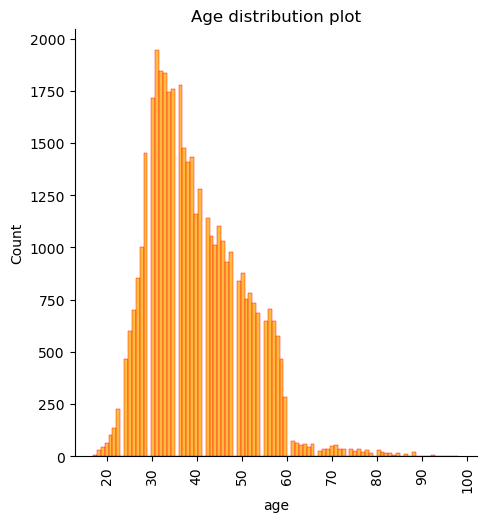

In [14]:
plot_hist(data['age'], 'Age distribution plot')

*thoughts*: Slightly skewed, not that bad

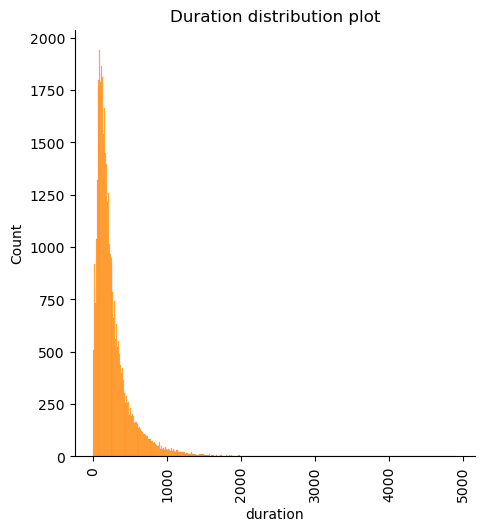

In [15]:
plot_hist(data['duration'], 'Duration distribution plot')

*thoughts*: Defintive skewed

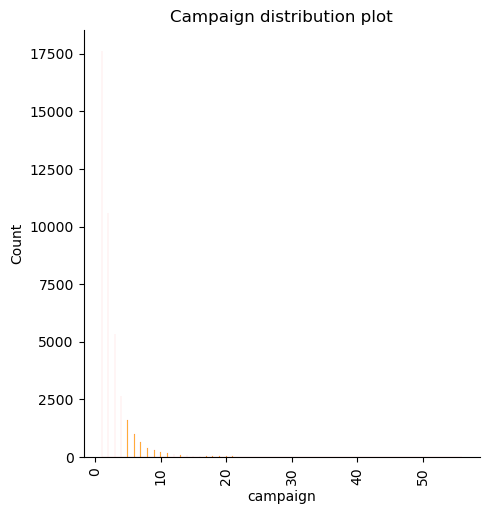

In [16]:
plot_hist(data['campaign'], 'Campaign distribution plot')

*thoughts*: Defintive skewed

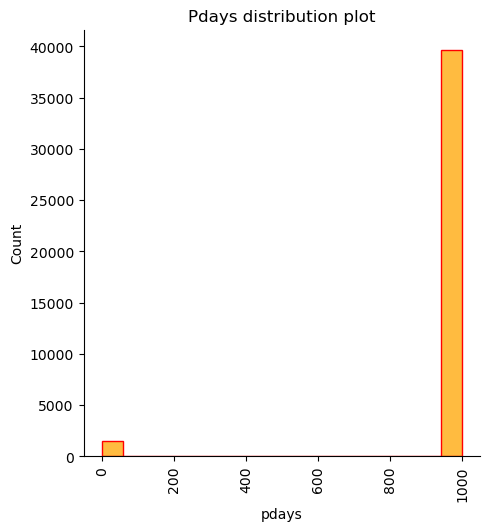

In [17]:

plot_hist(data['pdays'], 'Pdays distribution plot')

*thoughts*: those `999` values need to be handled, there are a ton

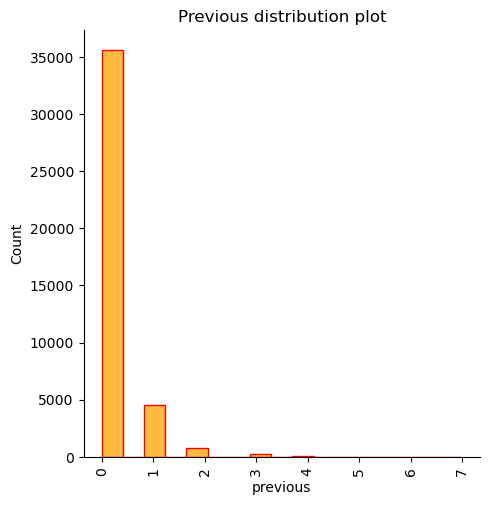

In [18]:
plot_hist(data['previous'], 'Previous distribution plot')

*thoughts*: Defintive skewed

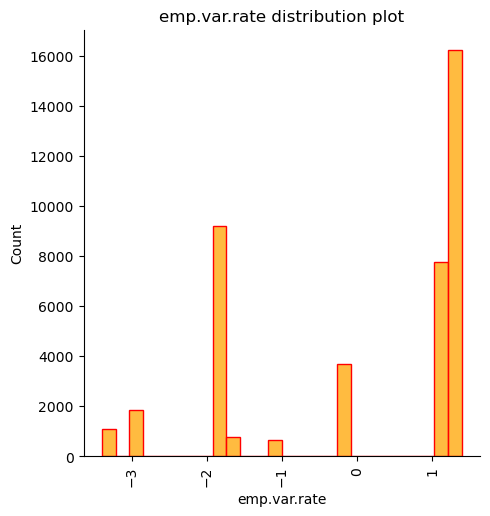

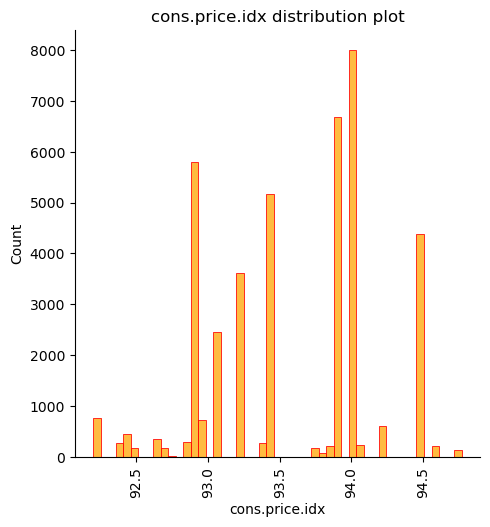

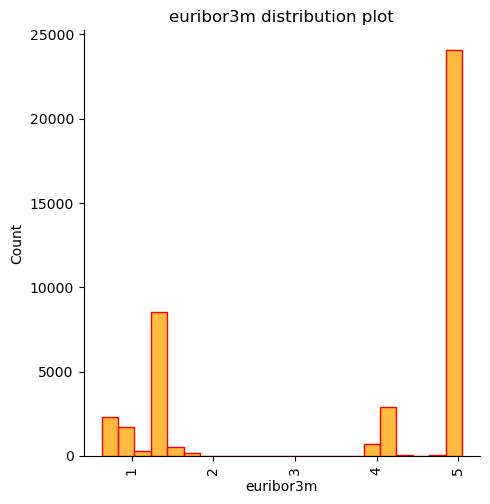

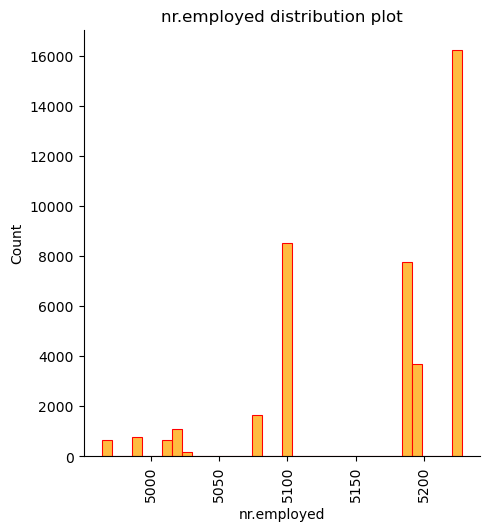

In [19]:

plot_hist(data['emp.var.rate'], 'emp.var.rate distribution plot')
plot_hist(data['cons.price.idx'], 'cons.price.idx distribution plot')
plot_hist(data['euribor3m'], 'euribor3m distribution plot')
plot_hist(data['nr.employed'], 'nr.employed distribution plot')

plt.tight_layout()

*thoughts*: Not really sure how to interpret these values...

<Figure size 640x480 with 0 Axes>

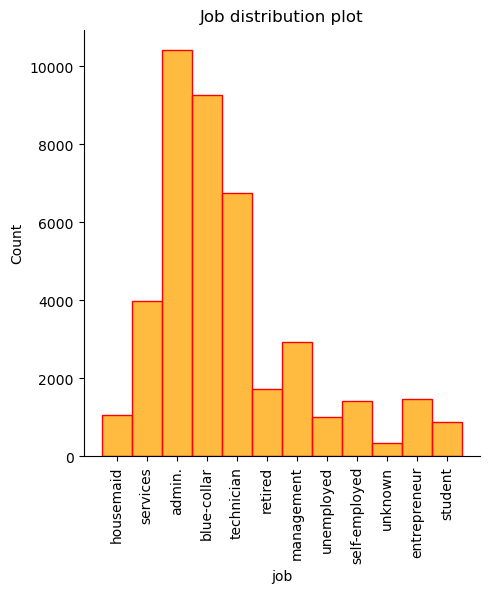

In [20]:
plot_hist(data['job'], 'Job distribution plot')

*thoughts*: I think looks good enough

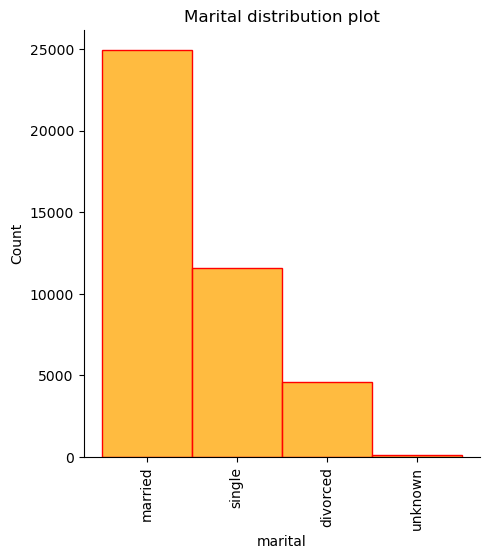

In [21]:
plot_hist(data['marital'], 'Marital distribution plot')

*thoughts*: mostly married people here

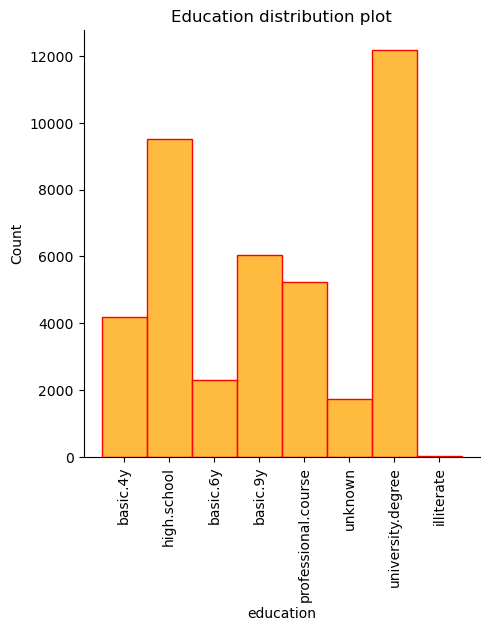

In [22]:
plot_hist(data['education'], 'Education distribution plot')

*thoughts*: looks ok I think

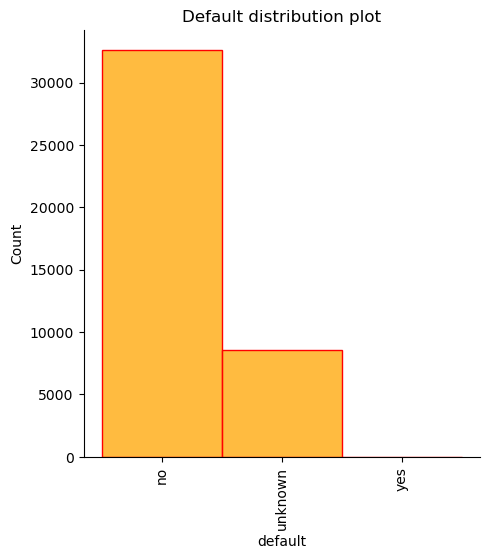

In [23]:
plot_hist(data['default'], 'Default distribution plot')

*thoughts*: few defaults, a fair amount of unknowns

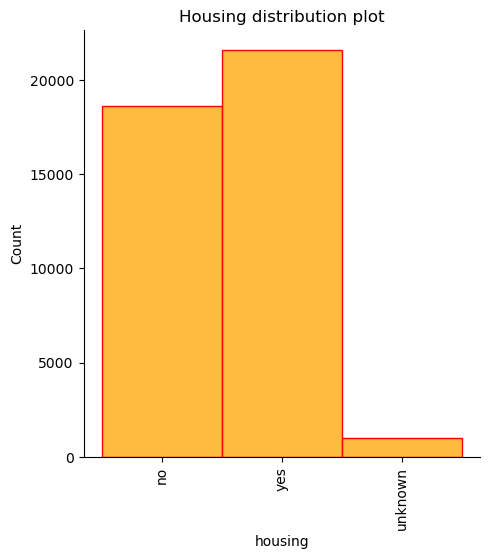

In [24]:
plot_hist(data['housing'], 'Housing distribution plot')

*thoughts*: a few unknows but the yes/no distribution is not bad

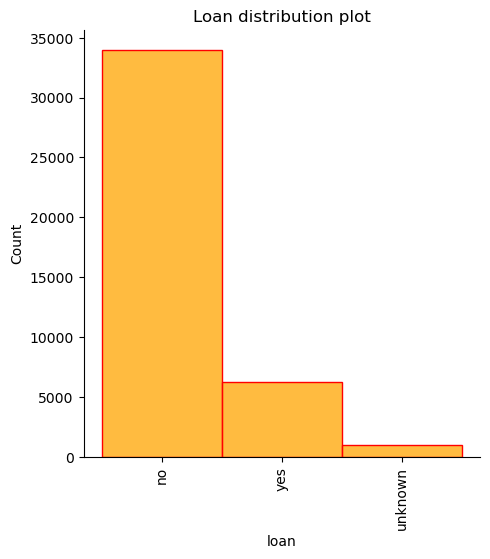

In [25]:
plot_hist(data['loan'], 'Loan distribution plot')

*thoughts*: very skewed

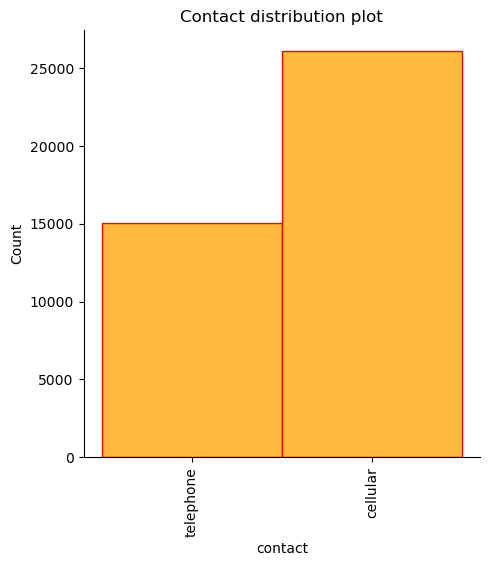

In [26]:
plot_hist(data['contact'], 'Contact distribution plot')

*thoughts*: mostly cellular, makes sense

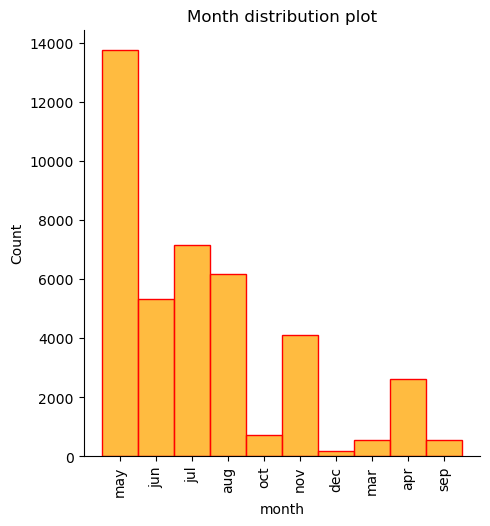

In [27]:
plot_hist(data['month'], 'Month distribution plot')

*thoughts*: someting happened in May, worth investigating I think

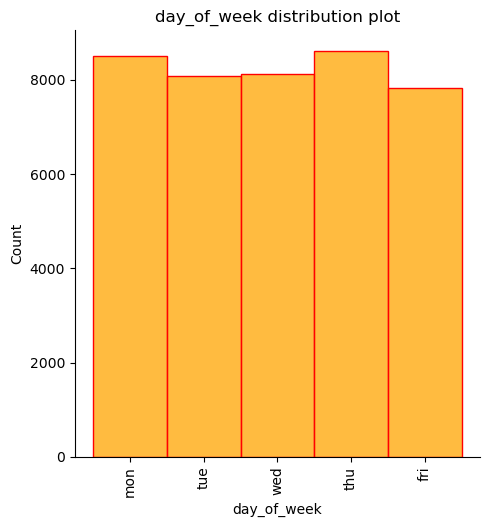

In [28]:
plot_hist(data['day_of_week'], 'day_of_week distribution plot')

*thoughts*: looks good

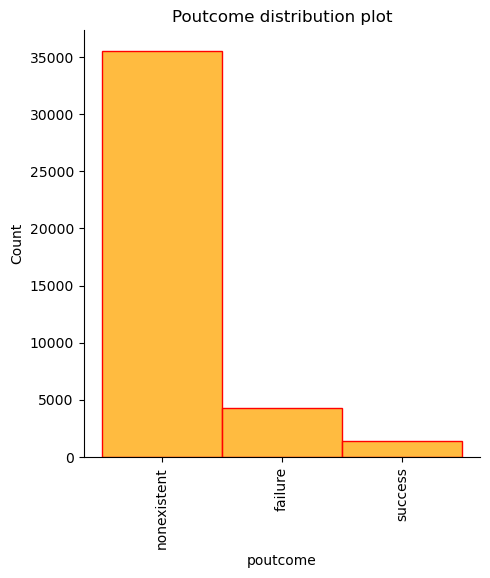

In [29]:

plot_hist(data['poutcome'], 'Poutcome distribution plot')

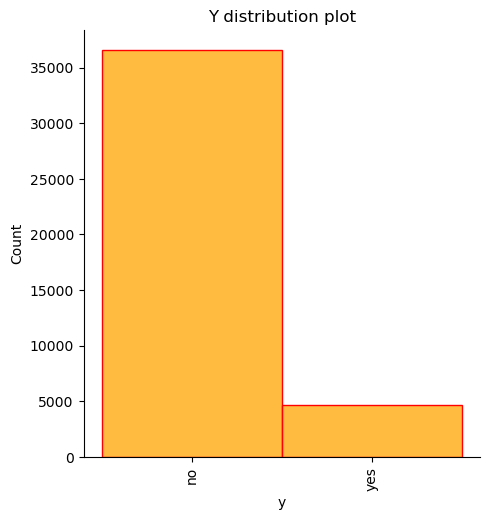

In [30]:
plot_hist(data['y'], 'Y distribution plot')

*thoughts*: heavily unbalanced towards 'no'

#### Multivariate analysis 

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


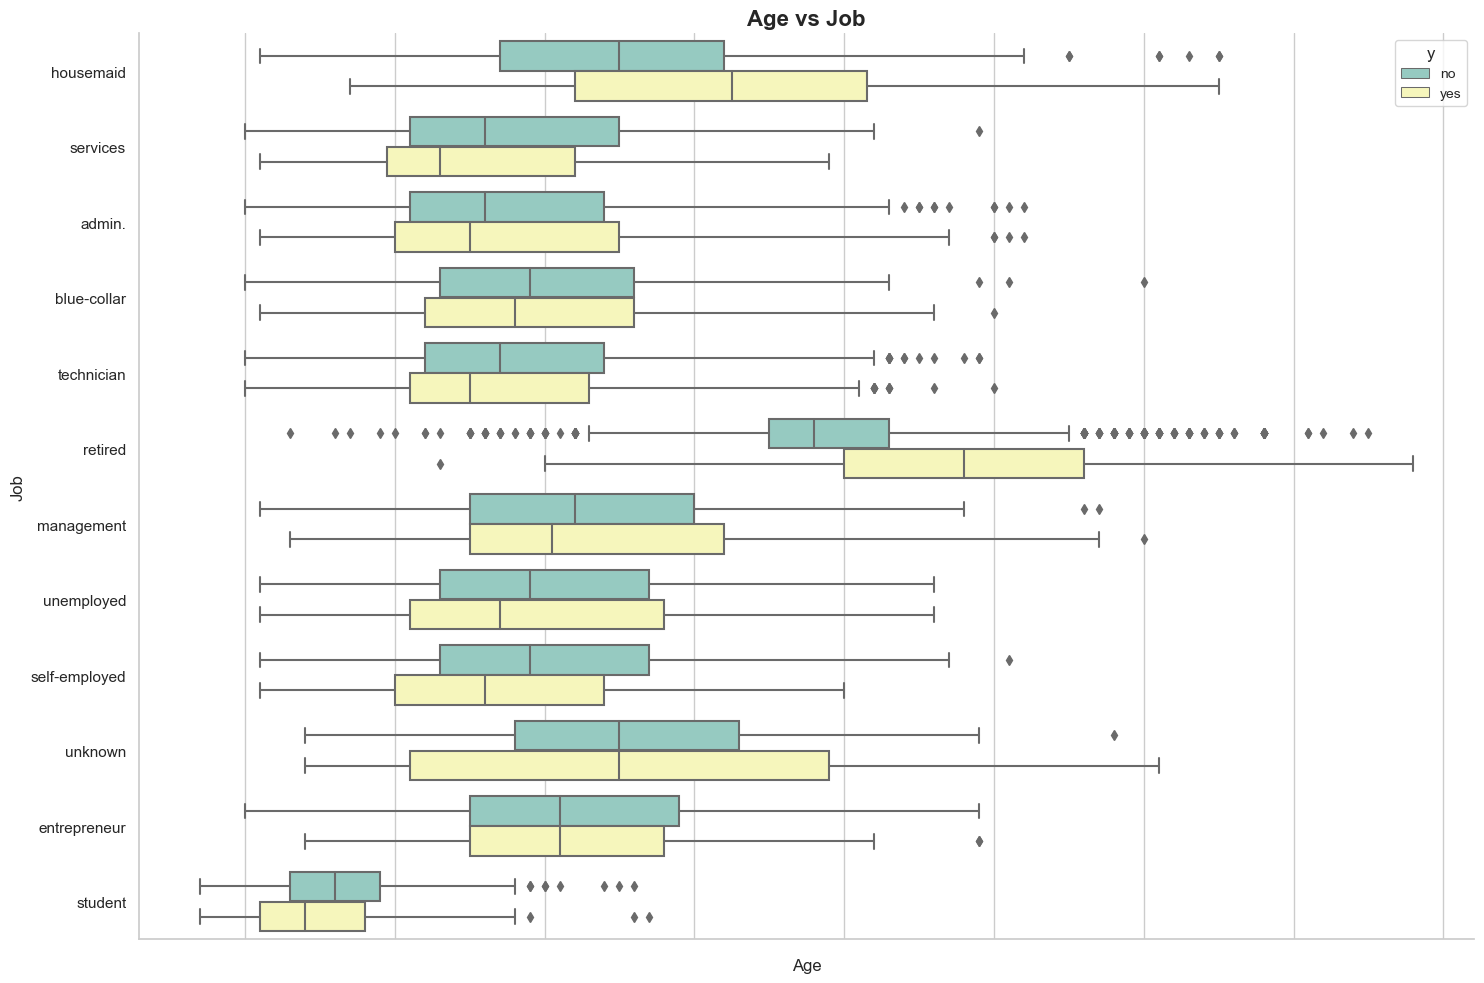

In [31]:
plot_box(data, 'age', 'job', 'Age', 'Job', 'Age vs Job', hue='y', figsize=(15, 10))

*thoughts*: seems like retired clients closer to 70 years old are good potential subscribers to a term deposit

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


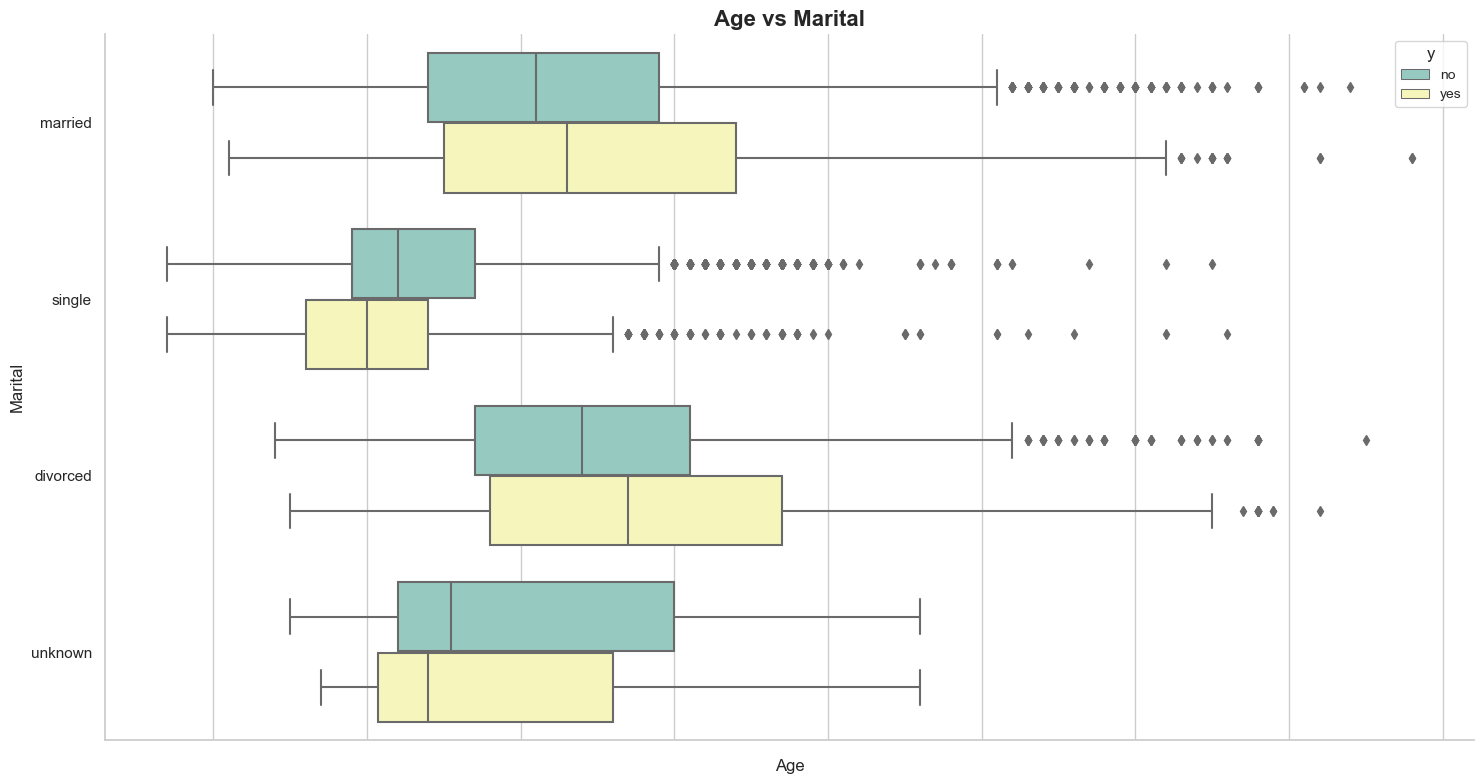

In [32]:
plot_box(data, 'age', 'marital', 'Age', 'Marital', 'Age vs Marital', hue='y', figsize=(15, 8))

*thoughts*: no obvious winner here

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


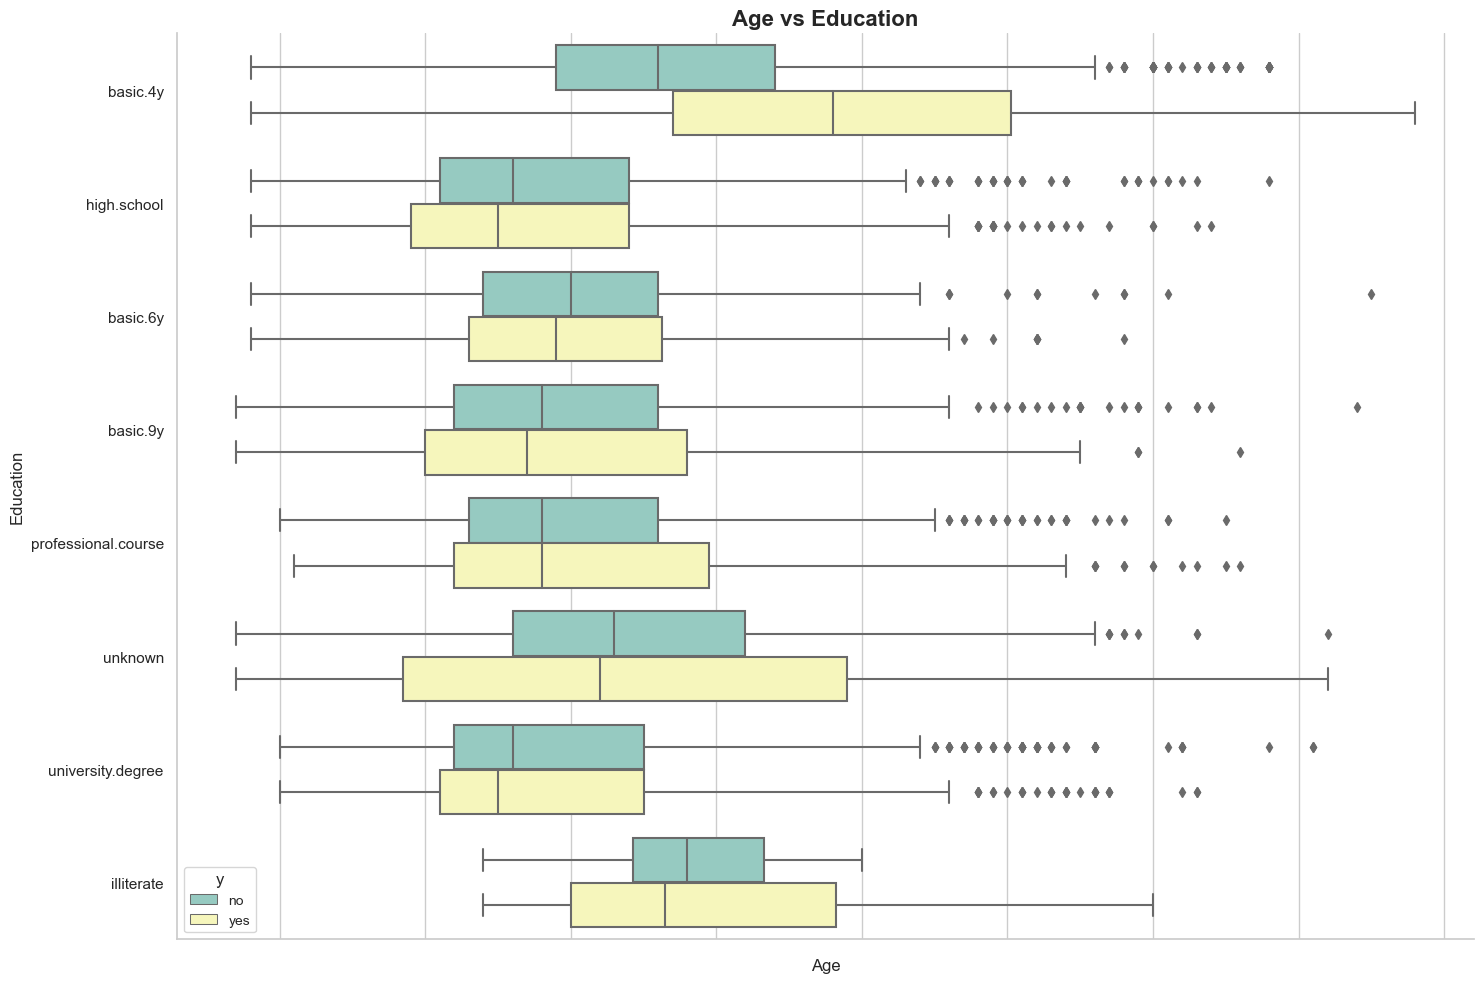

In [33]:
plot_box(data, 'age', 'education', 'Age', 'Education', 'Age vs Education', hue='y', figsize=(15, 10))

*thoughts*: seems like "basic 4y education" clients closer to their 60s are good potential subscribers to a term deposit

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


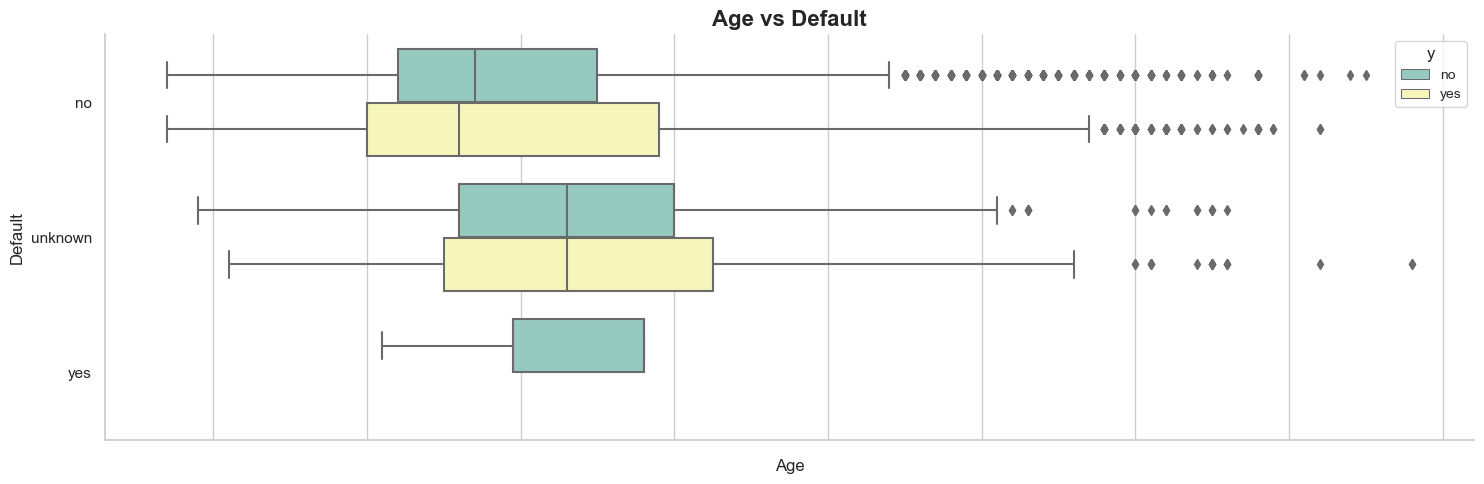

In [34]:
plot_box(data, 'age', 'default', 'Age', 'Default', 'Age vs Default', hue='y', figsize=(15, 5))

*thoughts*: clients with a default is a clear 'no'

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


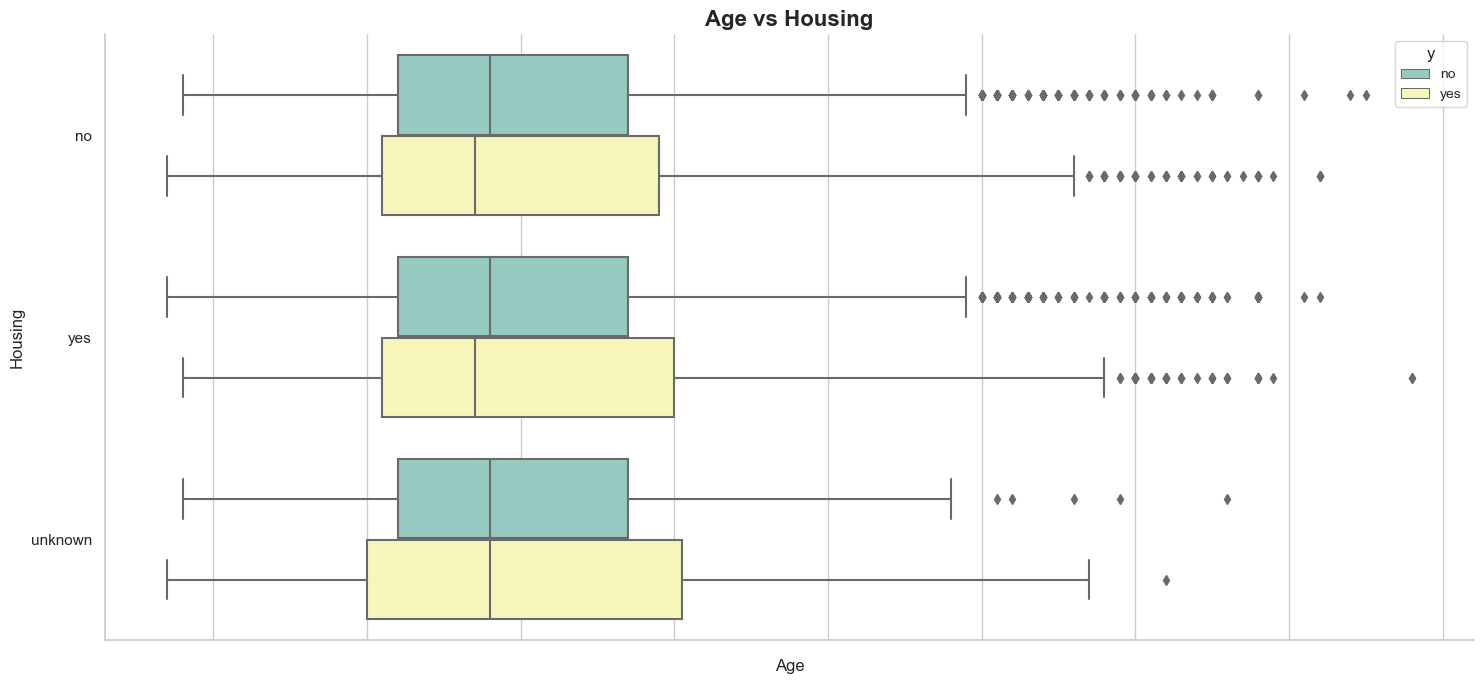

In [35]:
plot_box(data, 'age', 'housing', 'Age', 'Housing', 'Age vs Housing', hue='y', figsize=(15, 7))

*thoughts*: no obvious trend here

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


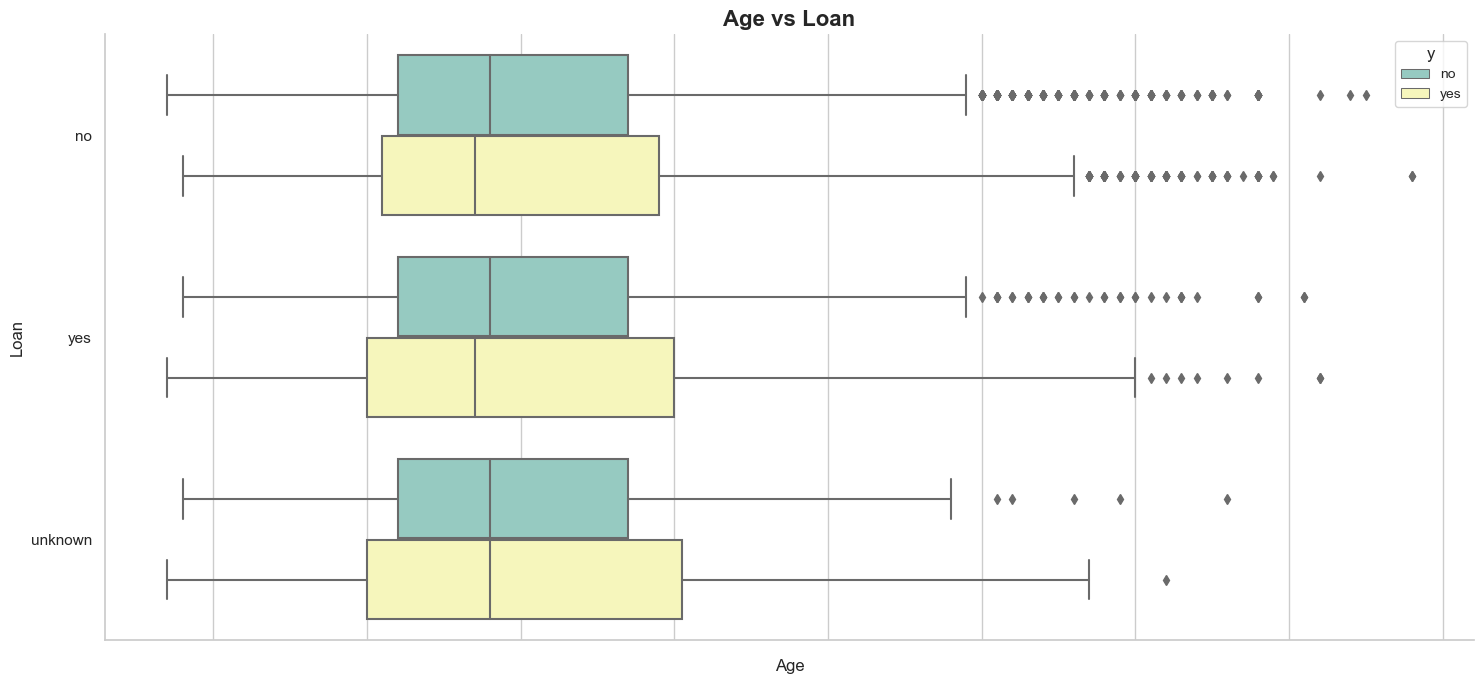

In [36]:
plot_box(data, 'age', 'loan', 'Age', 'Loan', 'Age vs Loan', hue='y', figsize=(15, 7))

*thoughts*: no obvious trend here

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


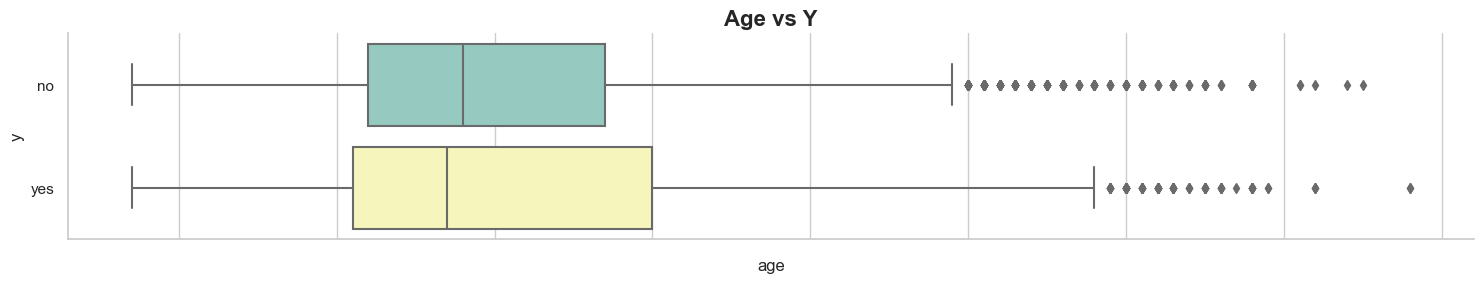

In [37]:
plot_box(data, 'age', 'y', 'age', 'y', 'Age vs Y', figsize=(15, 3))

*thoughts*: Clients who subscribed to a term deposit (y='yes') tend to be slightly older than those who didn't.

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


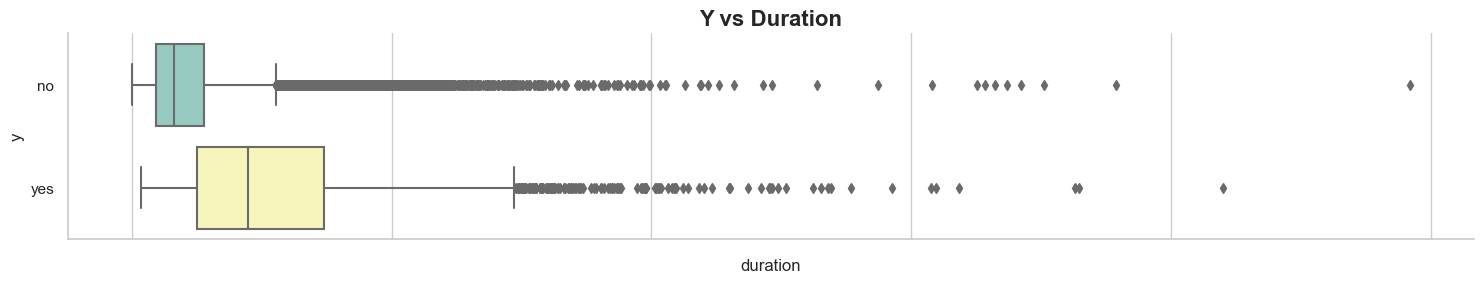

In [38]:
plot_box(data, 'duration', 'y', 'duration', 'y', 'Y vs Duration', figsize=(15, 3))

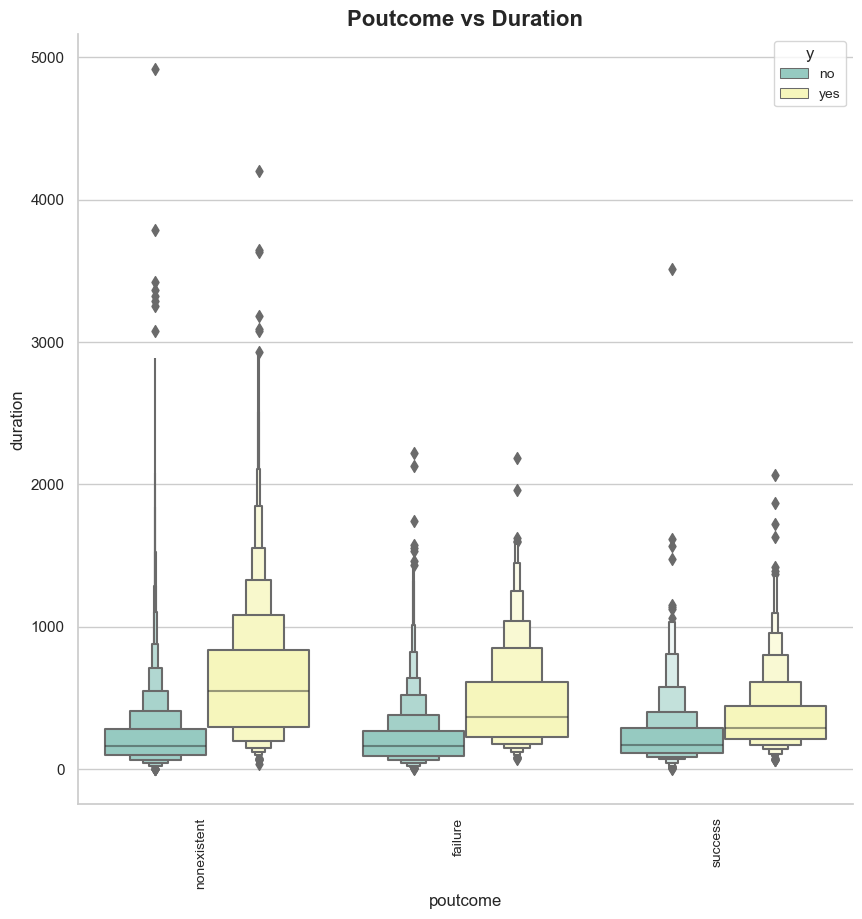

In [39]:
plot_boxen(data, 'poutcome', 'duration', 'poutcome', 'duration', 'Poutcome vs Duration', hue='y', figsize=(10, 10))

*thoughts*: Duration is consistently higher on successful Y's across all poutcomes

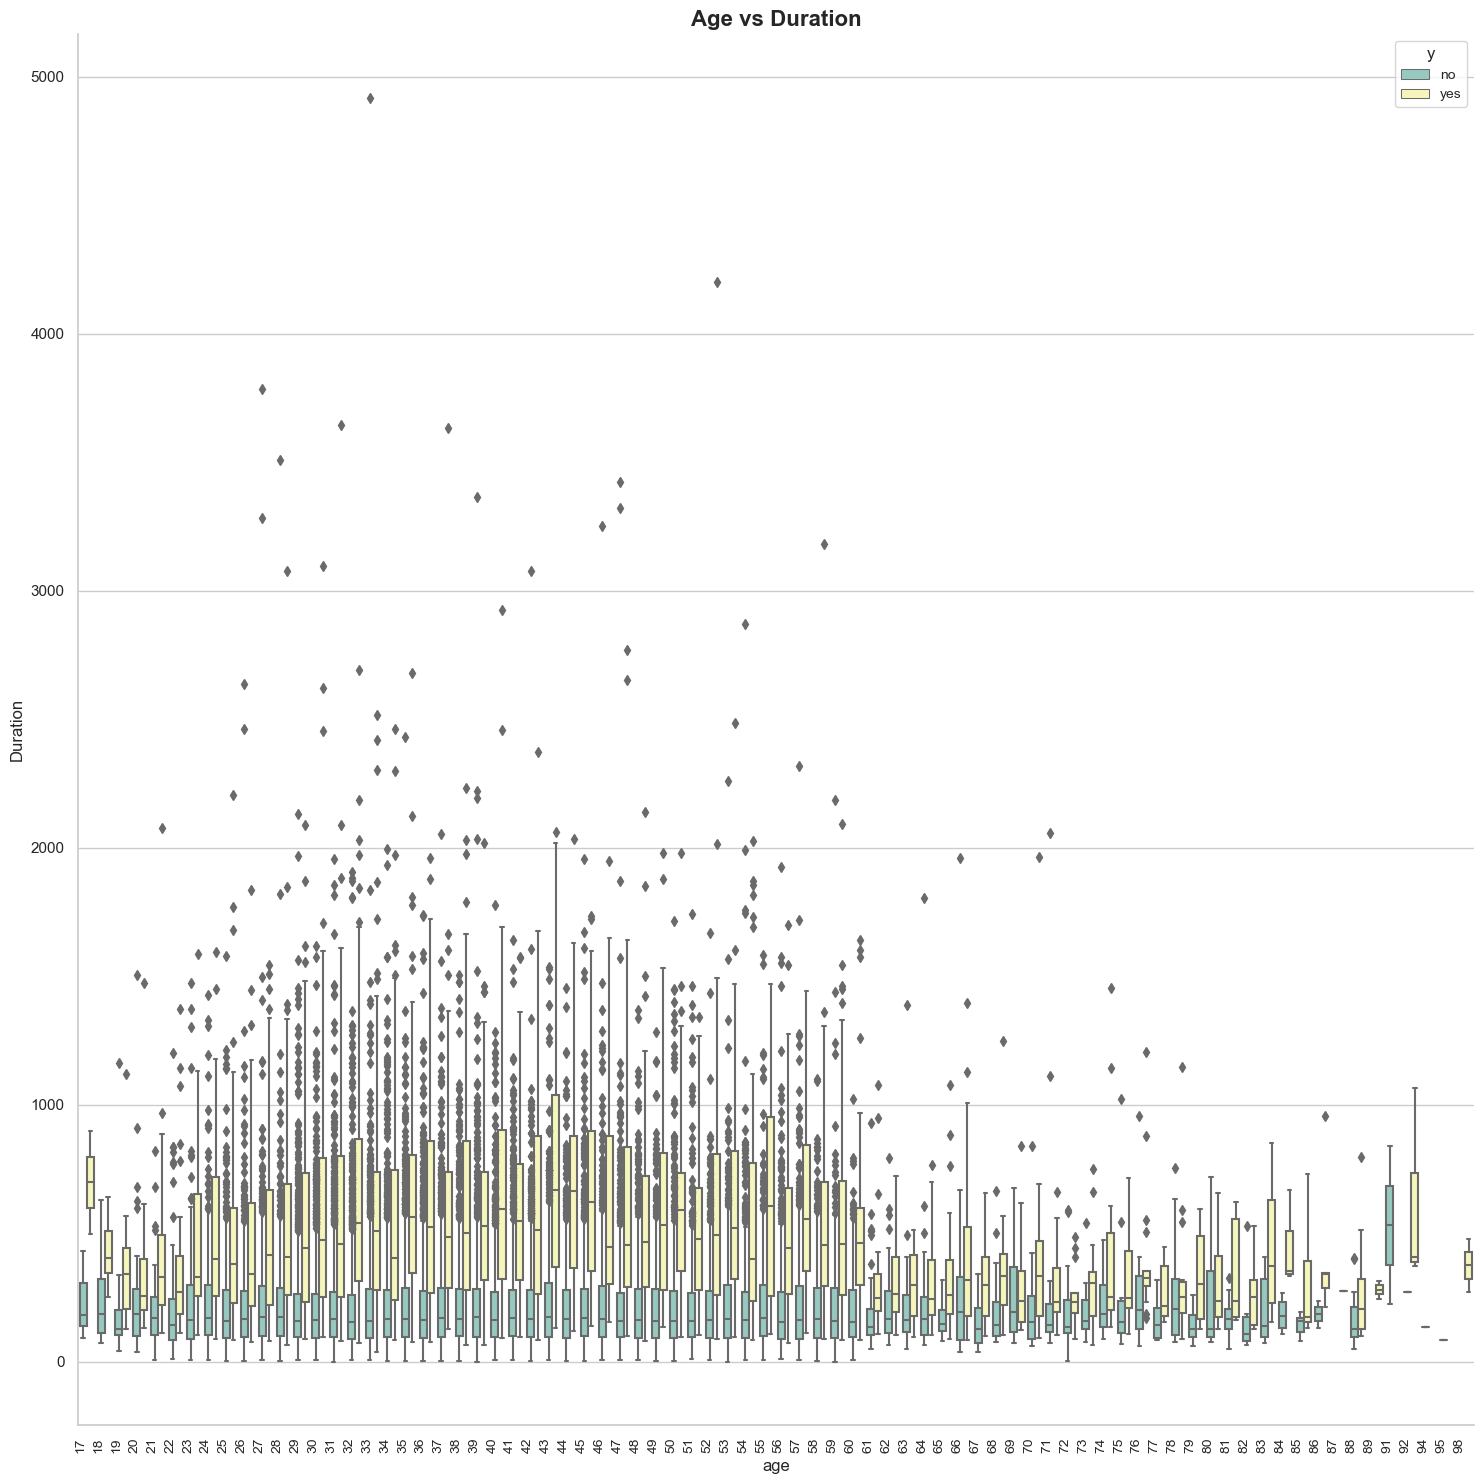

In [40]:
plot_box(data, 'age', 'duration', 'age', 'Duration', 'Age vs Duration', hue='y', figsize=(15, 15))

*thoughts*: People that spend more time on the call, are more likely to say 'yes'

In [41]:
def y_encoded(y):
    if y == 'yes':
        return 1
    else:
        return 0

def encode_y(data):
    data_tmp = data.copy()
    data_tmp['y'] = data_tmp['y'].apply(y_encoded)
    return data_tmp

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


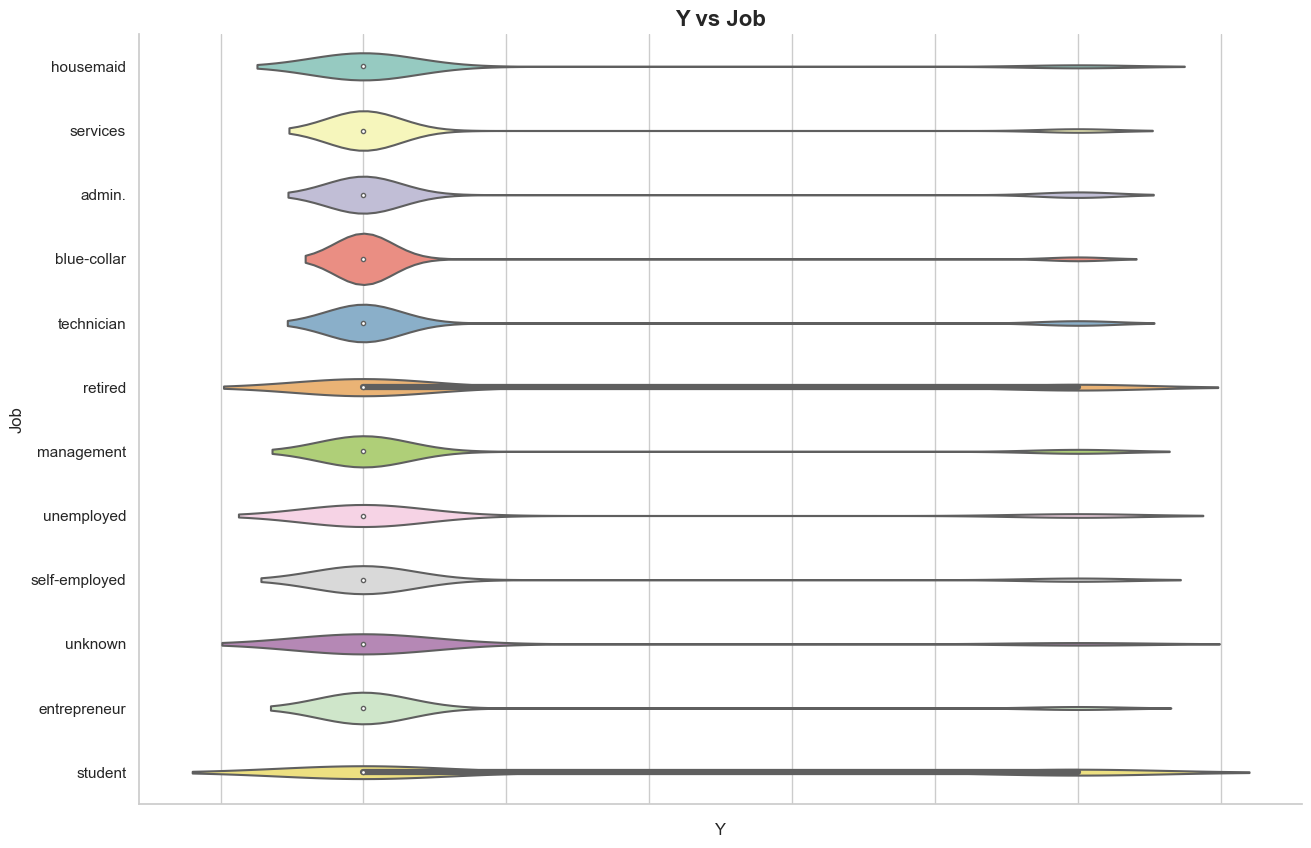

In [42]:
plot_violin(encode_y(data), 'y', 'job', 'Y', 'Job', 'Y vs Job',figsize=(15, 10))

*thoughts*: seems like retied and students have the higher chance of acceptance. I need to investigate this more

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


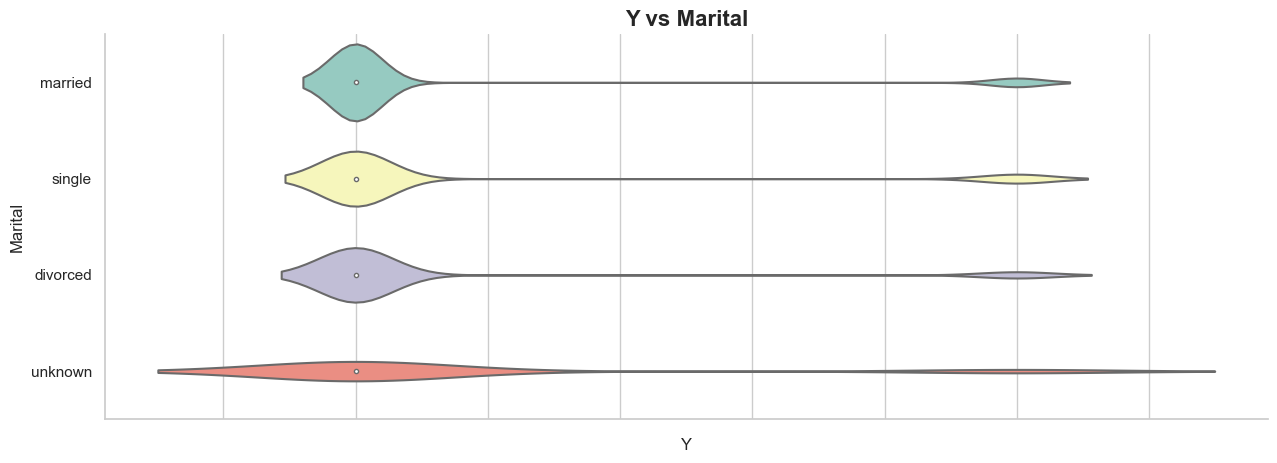

In [43]:
plot_violin(encode_y(data), 'y', 'marital', 'Y', 'Marital', 'Y vs Marital',figsize=(15, 5))

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


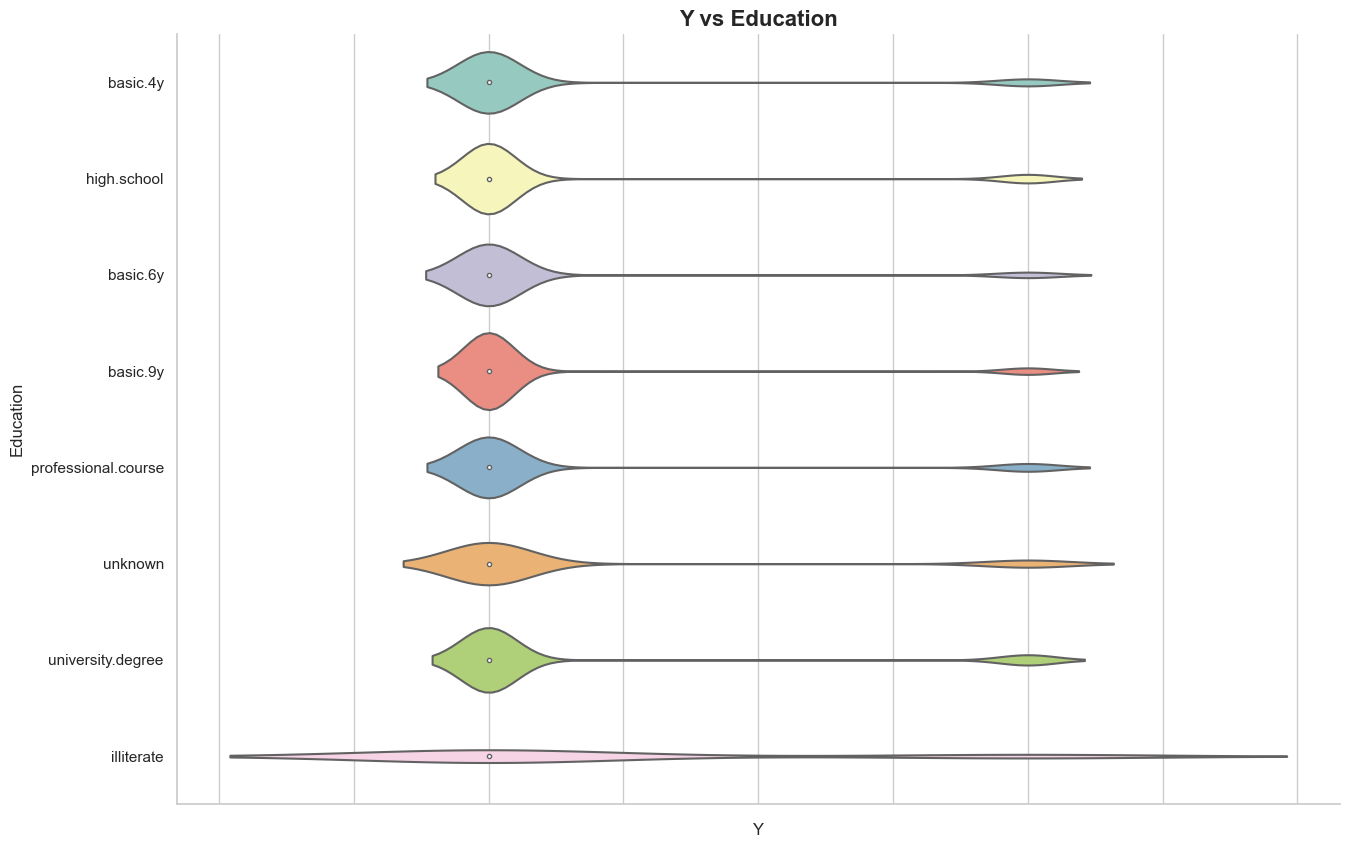

In [44]:
plot_violin(encode_y(data), 'y', 'education', 'Y', 'Education', 'Y vs Education',figsize=(15, 10))

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


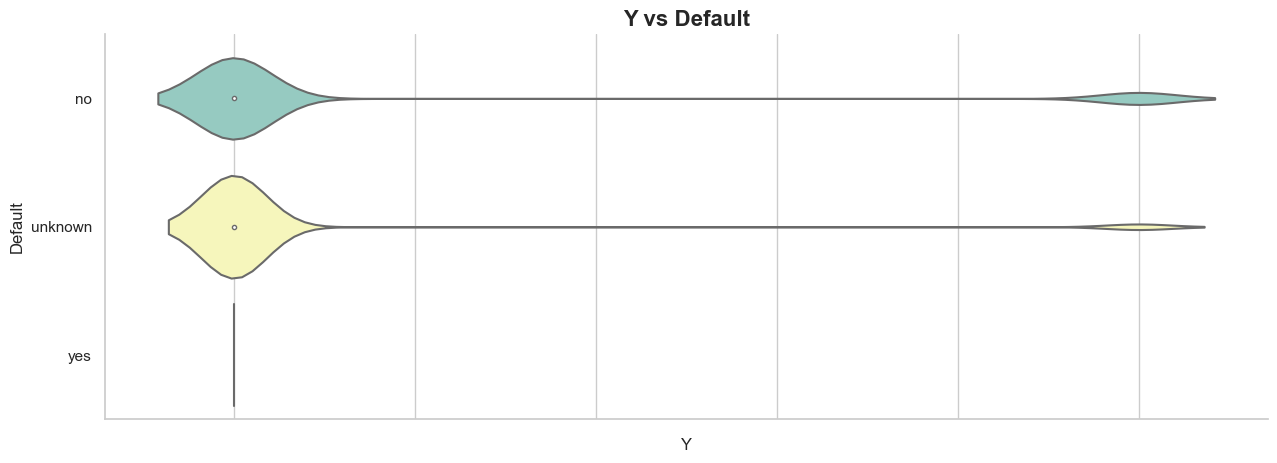

In [45]:
plot_violin(encode_y(data), 'y', 'default', 'Y', 'Default', 'Y vs Default',figsize=(15, 5))

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


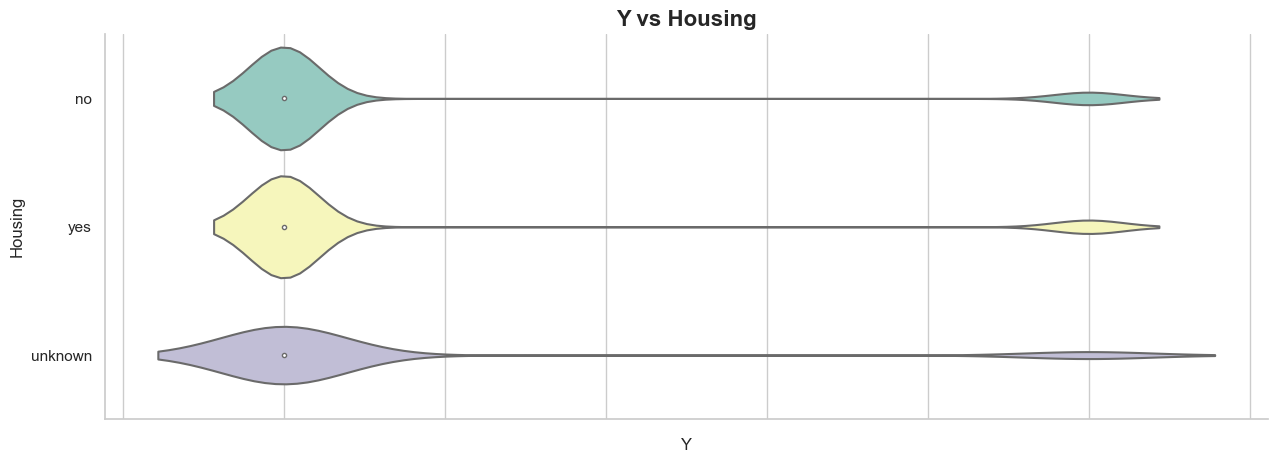

In [46]:
plot_violin(encode_y(data), 'y', 'housing', 'Y', 'Housing', 'Y vs Housing',figsize=(15, 5))

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


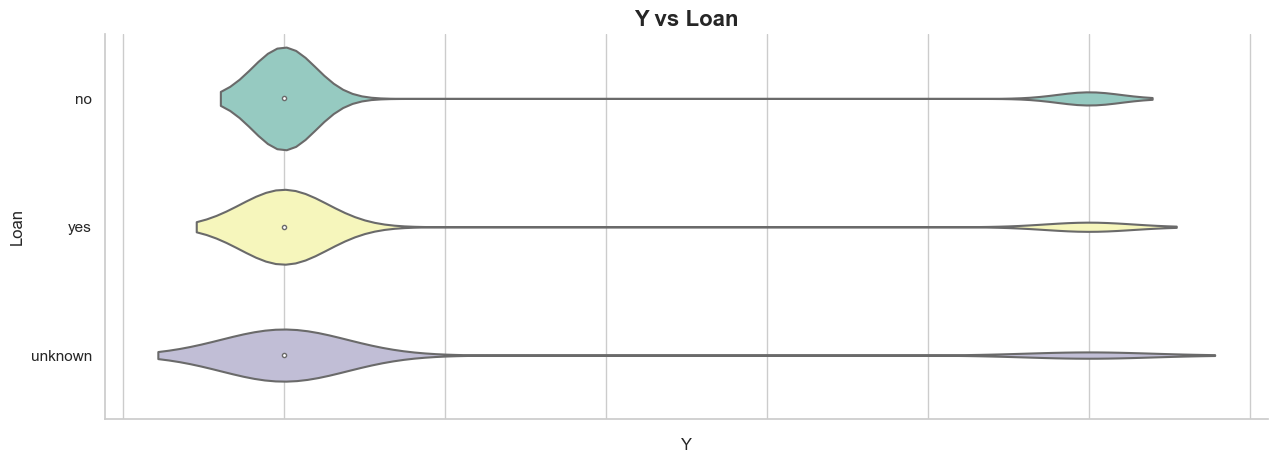

In [47]:
plot_violin(encode_y(data), 'y', 'loan', 'Y', 'Loan', 'Y vs Loan',figsize=(15, 5))

/var/folders/cc/psdqzrt5743dsmcrz03hh4zw0000gn/T/ipykernel_33032/3306650540.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=90, ha='right', fontsize=10)


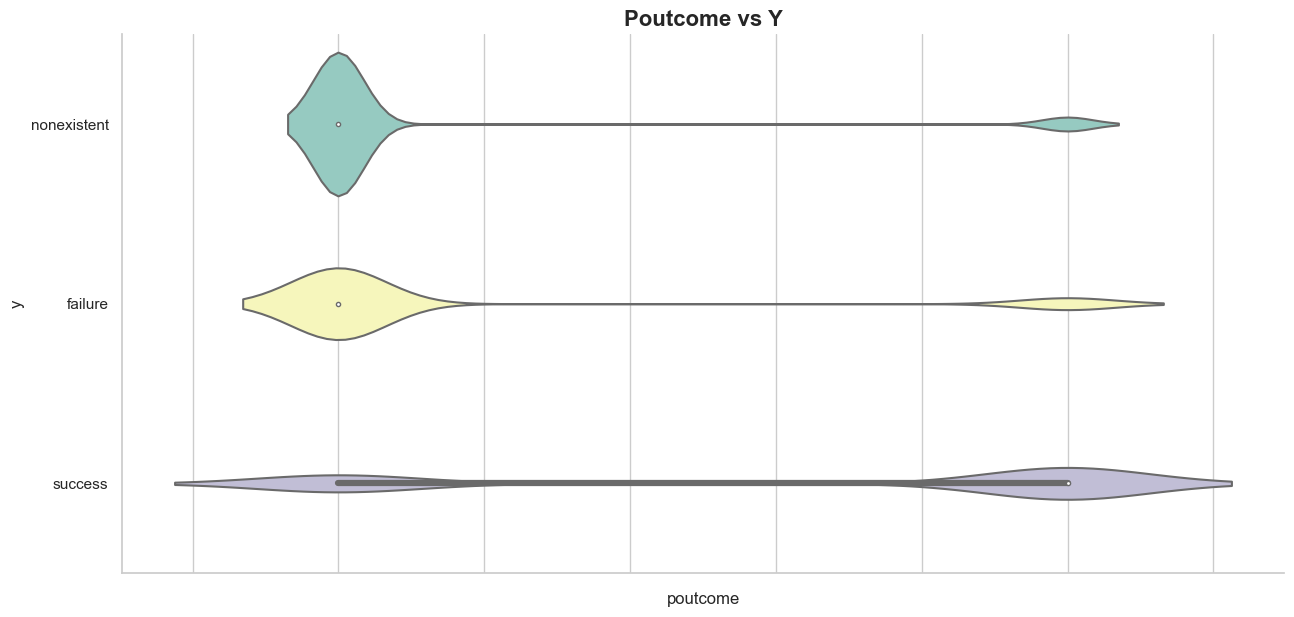

In [48]:
plot_violin(encode_y(data), 'y', 'poutcome', 'poutcome', 'y', 'Poutcome vs Y',figsize=(15, 7))

In [49]:
encode_y(data)['y'].value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

*thoughts*: 11% of success rate on Y

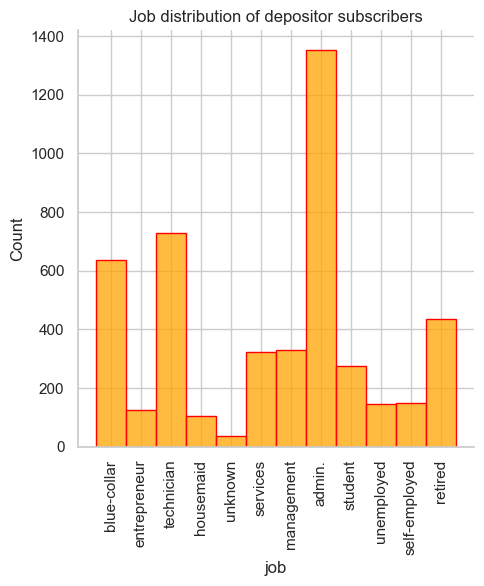

In [50]:
plot_hist(encode_y(data).query('y == 1')['job'],'Job distribution of depositor subscribers')

*thoughts*: clients with an admin, technician, and blue-collar jobs dominate the subscriptions to a term deposit

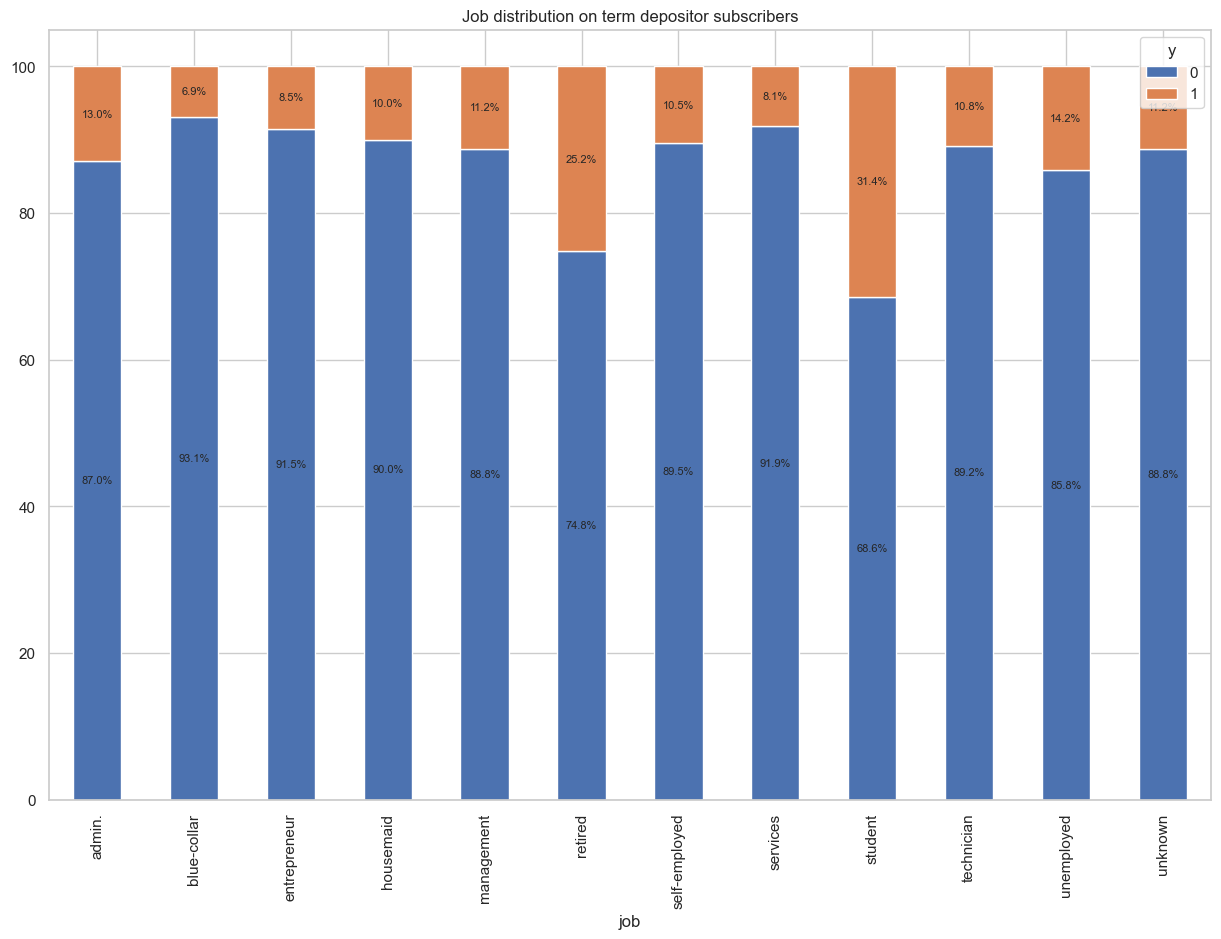

In [51]:
import matplotlib.pyplot as plt

data_by_job = encode_y(data).groupby('job')['y'].value_counts(normalize=True)*100
ax = data_by_job.unstack().plot(kind='bar', stacked=True, figsize=(15, 10))

# Get the y-axis height to calculate label position from.
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}%'  # e.g. 8.9%

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # only plot labels greater than given height
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

plt.title('Job distribution on term depositor subscribers')

plt.savefig('images/job_distribution_y.png', dpi=300)
plt.show()

*thoughts*: confirmed: retied and students tend to subscribe more. Having said that, admin, technician, and blue-collar represent the majority of the client base

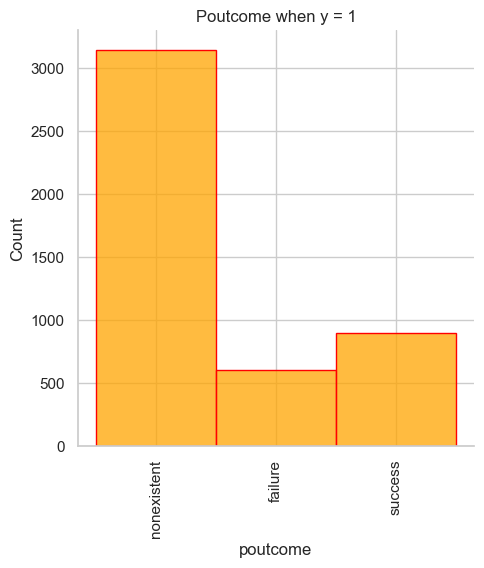

In [52]:
plot_hist(encode_y(data).query('y == 1')['poutcome'],'Poutcome when y = 1')

*thoughts*: poutcome distrubution when Y is 'yes' (or 1)

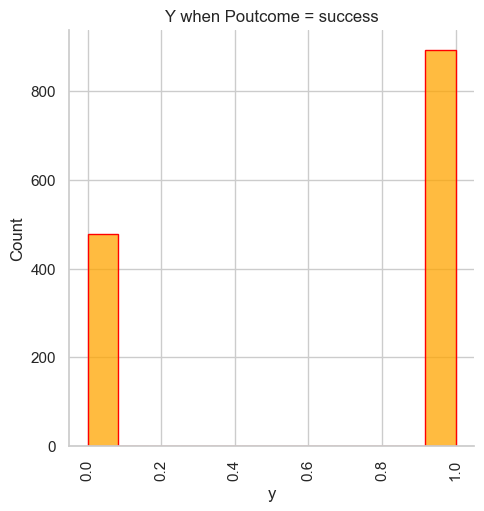

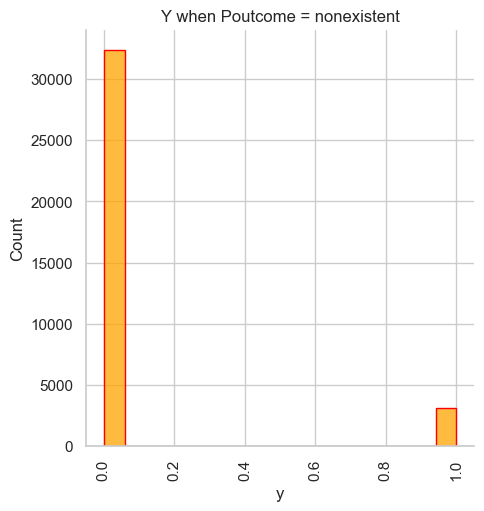

In [53]:
plot_hist(encode_y(data).query('poutcome == "success"')['y'],'Y when Poutcome = success')
plot_hist(encode_y(data).query('poutcome == "nonexistent"')['y'],'Y when Poutcome = nonexistent')

*thoughts*: when poutcome is successful, the chances of y = 'yes' increase a lot!

#### Business Objective

*"The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit."*

#### Hypothesis

$\color{green}{Hypothesis}$ 

- If the client is studying or retired, you increase the chances to get a term depositor
- If poutcome is sucessful, the outcome of Y most likely will be a 'yes'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [54]:
# Define numerical and categorical variables
num_vars = ['age']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
label = ['y']

In [55]:
term_deposit_df = data[num_vars + cat_vars + label].copy()
term_deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [56]:
# Initialize the label encoder
le = LabelEncoder()

# Encode the target variable
term_deposit_df['y'] = le.fit_transform(term_deposit_df['y'])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_vars)],  remainder='passthrough')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [57]:
# Prepare the features and target variable
X = term_deposit_df.drop('y', axis=1)
y = term_deposit_df['y']


# Split the data into training and testing sets using stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the preprocessor and transform the training data
X_train_unscaled = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_unscaled = preprocessor.transform(X_test)

X_train_unscaled.shape, X_test_unscaled.shape

((32950, 34), (8238, 34))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [58]:
# dummy classifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

# fit the model
dummy_clf.fit(X_train_unscaled, y_train)

# predict on test set
y_pred = dummy_clf.predict(X_test_unscaled)

# calculate accuracy
accuracy_score(y_test, y_pred)


0.803714493809177

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [59]:
# track fitting time
start = time.time()
basic_lr = LogisticRegression().fit(X_train_unscaled, y_train)
end = time.time()

# capture model fitting time
basic_lr_time = end - start

### Problem 9: Score the Model

What is the accuracy of your model?

In [60]:
# predict on test set
y_pred = basic_lr.predict(X_test_unscaled)

# calculate accuracy
accuracy_score(y_test, y_pred)

0.8873512988589464

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|.     |.    |.     |.     |

#### Basic KNN Model

In [61]:
# track fitting time
start = time.time()
basic_knn = KNeighborsClassifier().fit(X_train_unscaled, y_train)
end = time.time()

# capture model fitting time
basic_knn_time = end - start

# predict on test set
y_pred = basic_knn.predict(X_test_unscaled)

# calculate accuracy
accuracy_score(y_test, y_pred)

/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.876911871813547

#### Basic Decision Tree Model

In [62]:
# track fitting time
start = time.time()
basic_dt = DecisionTreeClassifier().fit(X_train_unscaled, y_train)
end = time.time()

# capture model fitting time
basic_dt_time = end - start

# predict on test set
y_pred = basic_dt.predict(X_test_unscaled)

# calculate accuracy
accuracy_score(y_test, y_pred)

0.864530225782957

#### Basic SVM Model

In [63]:
# track fitting time
start = time.time()
basic_svc = SVC().fit(X_train_unscaled, y_train)
end = time.time()

# capture model fitting time
basic_svc_time = end - start

# predict on test set
y_pred = basic_svc.predict(X_test_unscaled)

# calculate accuracy
accuracy_score(y_test, y_pred)

0.8873512988589464

In [64]:
# build a dataframe to compare the models
basic_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],

    'Train Time': [basic_lr_time, basic_knn_time, basic_dt_time, basic_svc_time],

    'Train Accuracy': [accuracy_score(y_train, basic_lr.predict(X_train_unscaled)),
                    accuracy_score(y_train, basic_knn.predict(X_train_unscaled)),
                    accuracy_score(y_train, basic_dt.predict(X_train_unscaled)),
                    accuracy_score(y_train, basic_svc.predict(X_train_unscaled))],

    'Test Accuracy': [accuracy_score(y_test, basic_lr.predict(X_test_unscaled)),
                    accuracy_score(y_test, basic_knn.predict(X_test_unscaled)),
                    accuracy_score(y_test, basic_dt.predict(X_test_unscaled)),
                    accuracy_score(y_test, basic_svc.predict(X_test_unscaled))],
})

basic_models

/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.209590,0.887344,0.887351
1,KNN,0.004157,0.891593,0.876912
2,Decision Tree,0.465886,0.917056,0.864530
3,SVC,11.529050,0.887344,0.887351


*htoughts*: I'll go for accuracy as a score since the business requires a balanced model that cares about both negative and positive classes

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### More Feature Engineering

In [65]:
num_vars = ['age', 'duration', 'campaign']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

*thoughts*: based on the initial data analysis, I would like to test incorporating "duration", "poutcome", and "loan". I'll add a few other categorical features in case I missed anything in my analysis. I'm leaving `pdays` and `month` out of the model. I think `pdays` has a ton of `999` values (which is the same as null) making it pretty much useless. The `month` feature could create a bias in the model thinking that 'may' is a good month to get a term deposit (which I don't think this is the case based on the information found in the article attached).

In [66]:
term_deposit_df = data[num_vars + cat_vars + label].copy()
term_deposit_df.describe()

,age,duration,campaign
count,40227.000000,40227.000000,40227.000000
mean,40.035921,232.161111,2.566609
std,10.426593,187.957594,2.779855
min,17.000000,0.000000,1.000000
25%,32.000000,101.000000,1.000000
50%,38.000000,175.000000,2.000000
75%,47.000000,304.000000,3.000000
max,98.000000,999.000000,56.000000


In [ ]:
term_deposit_df = term_deposit_df[term_deposit_df['duration'] < 1000]
term_deposit_df.describe()

*thoughts*: durantion is skewed, I'll try to normalize it

In [67]:
# Initialize the label encoder
le = LabelEncoder()

# Encode the target variable
term_deposit_df['y'] = le.fit_transform(term_deposit_df['y'])

# Define preprocessor
preprocessor_scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(), cat_vars)])

*thoughts*: scaling the data is a good way of improving the performance of the models

In [68]:
# Prepare the features and target variable
X = term_deposit_df.drop('y', axis=1)
y = term_deposit_df['y']

# Split the data into training and testing sets using stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the preprocessor and transform the training data
X_train_scaled = preprocessor_scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = preprocessor_scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((32181, 46), (8046, 46))

*thoughts*: a new set of train and test data set using the one-hot and scaler transformations

#### Hyperparameter optimization


- Implementing GridsearchCV
- Optimizing for 'roc_auc'

#### Optimized KNN

In [69]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [2, 5, 10, 15, 20, 25, 30],
    # 'weights': ['uniform', 'distance'],
    # 'metric': ['euclidean', 'manhattan']
}

# Initialize the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')

# track fitting time
start = time.time()

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

end = time.time()

# capture model fitting time
best_knn_time = end - start

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best model to make predictions
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# precision_knn = precision_score(y_test, y_pred_knn)
# recall_knn = recall_score(y_test, y_pred_knn)
# f1_knn = f1_score(y_test, y_pred_knn)

accuracy_knn #, precision_knn, recall_knn, f1_knn

{'n_neighbors': 30}
0.8644573599607099


/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.905170270942083

#### Optimized Decision Tree

In [70]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [28, 30, 31, 32, 33],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 3, 4, 5]
}

# Initialize the grid search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')

# track fitting time
start = time.time()

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

end = time.time()

# capture model fitting time
best_dt_time = end - start

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best model to make predictions
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# precision_dt = precision_score(y_test, y_pred_dt)
# recall_dt = recall_score(y_test, y_pred_dt)
# f1_dt = f1_score(y_test, y_pred_dt)

accuracy_dt # , precision_dt, recall_dt, f1_dt

{'criterion': 'gini', 'max_depth': 28, 'min_samples_leaf': 5, 'min_samples_split': 15}
0.7783280406275201


0.9010688540889883

#### Optimized LogisticRegression

In [71]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc') # roc_auc

# track fitting time
start = time.time()

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

end = time.time()

# capture model fitting time
best_lr_time = end - start

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best model to make predictions
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
# precision_lr = precision_score(y_test, y_pred_lr, zero_division=1)
# recall_lr = recall_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)

accuracy_lr #, precision_lr, recall_lr, f1_lr

{'C': 0.1, 'solver': 'liblinear'}
0.8913926573489143


0.9149888143176734

#### Optimized SVM

In [72]:
from sklearn.model_selection import GridSearchCV

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Define the hyperparameter grid
param_grid = {
    # 'C': [1], # [0.1, 1, 10, 100]
    'gamma': [0.1, 1], # ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf'] # 'poly', 'sigmoid', 'rbf'
}

# Initialize the grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')

# track fitting time
start = time.time()

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

end = time.time()

# capture model fitting time
best_svm_time = end - start

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Use the best model to make predictions
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# precision_svm = precision_score(y_test, y_pred_svm)
# recall_svm = recall_score(y_test, y_pred_svm)
# f1_svm = f1_score(y_test, y_pred_svm)

accuracy_svm #, precision_svm, recall_svm, f1_svm


{'gamma': 0.1, 'kernel': 'rbf'}
0.8356906680123725


0.914740243599304

### Results Analysis

In [73]:
# build a dataframe to compare the models
optimized_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],

    'Train Time': [best_lr_time, best_knn_time, best_dt_time, best_svm_time],

    'Train Accuracy': [accuracy_score(y_train, best_lr.predict(X_train_scaled)),
                    accuracy_score(y_train, best_knn.predict(X_train_scaled)),
                    accuracy_score(y_train, best_dt.predict(X_train_scaled)),
                    accuracy_score(y_train, best_svm.predict(X_train_scaled))],

    'Test Accuracy': [accuracy_score(y_test, best_lr.predict(X_test_scaled)),
                    accuracy_score(y_test, best_knn.predict(X_test_scaled)),
                    accuracy_score(y_test, best_dt.predict(X_test_scaled)),
                    accuracy_score(y_test, best_svm.predict(X_test_scaled))],
})

optimized_models

/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/memozac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,3.825934,0.913023,0.914989
1,KNN,208.063544,0.908176,0.905170
2,Decision Tree,365.592310,0.937945,0.901069
3,SVC,716.056857,0.917467,0.914740


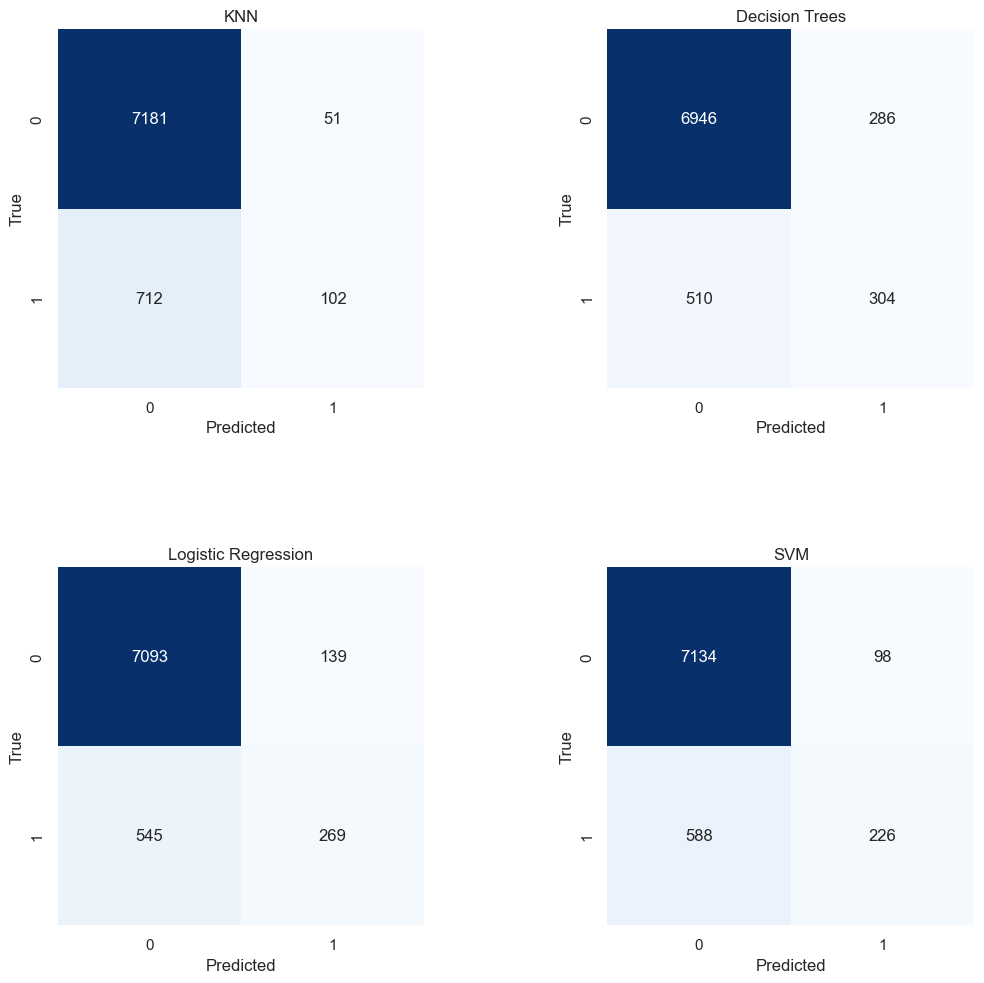

In [74]:
# Compute confusion matrices for each model
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define the list of confusion matrices and corresponding model names
cms = [cm_knn, cm_dt, cm_lr, cm_svm]
names = ['KNN', 'Decision Trees', 'Logistic Regression', 'SVM']

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, cm, name in zip(axes.flatten(), cms, names):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel='Predicted', ylabel='True', title=name)

# Adjust the layout
plt.tight_layout()

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# make it bigger
plt.rcParams['figure.figsize'] = (10, 10)

plt.show()

In [75]:
def accuracy_thresh(predict_probs,  y_test,  thresh):
    return accuracy_score(y_test,
                           np.where(predict_probs >= thresh, 1, 0))

def recall_thresh(predict_probs,  y_test,  thresh):
    return recall_score(y_test,
                           np.where(predict_probs >= thresh, 1, 0))


In [76]:
thresholds = np.arange(0, 1, .1)
models = [best_knn, best_dt, best_lr]

best_models_df = pd.DataFrame(columns=['model', 'threshold', 'precision'])

for model in models:
    test_predictions = model.predict_proba(X_test_scaled)
    results_df = pd.DataFrame({'model': model.__class__.__name__, 'threshold': thresholds, 'precision': [accuracy_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
    best_models_df = best_models_df.merge(results_df, how='outer')


In [77]:
high_precisions = best_models_df.groupby('model').max()['precision']

# find the best threshold for each model
best_thresholds = best_models_df[best_models_df['precision'].isin(high_precisions)].groupby('model').max()[['threshold','precision']]
best_thresholds



,threshold,precision
model,,
DecisionTreeClassifier,0.7,0.906910
KNeighborsClassifier,0.4,0.910763
LogisticRegression,0.7,0.914989


In [78]:
thresholds = np.arange(0, 1, .1)

models = [best_knn, best_dt, best_lr]

for model in models:
    test_predictions = model.predict_proba(X_test_scaled)
    results_df = pd.DataFrame({'threshold': thresholds, 'precision': [accuracy_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
    plt.plot(results_df['threshold'], results_df['precision'], '--o', label = model.__class__.__name__)
    plt.xticks(thresholds)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

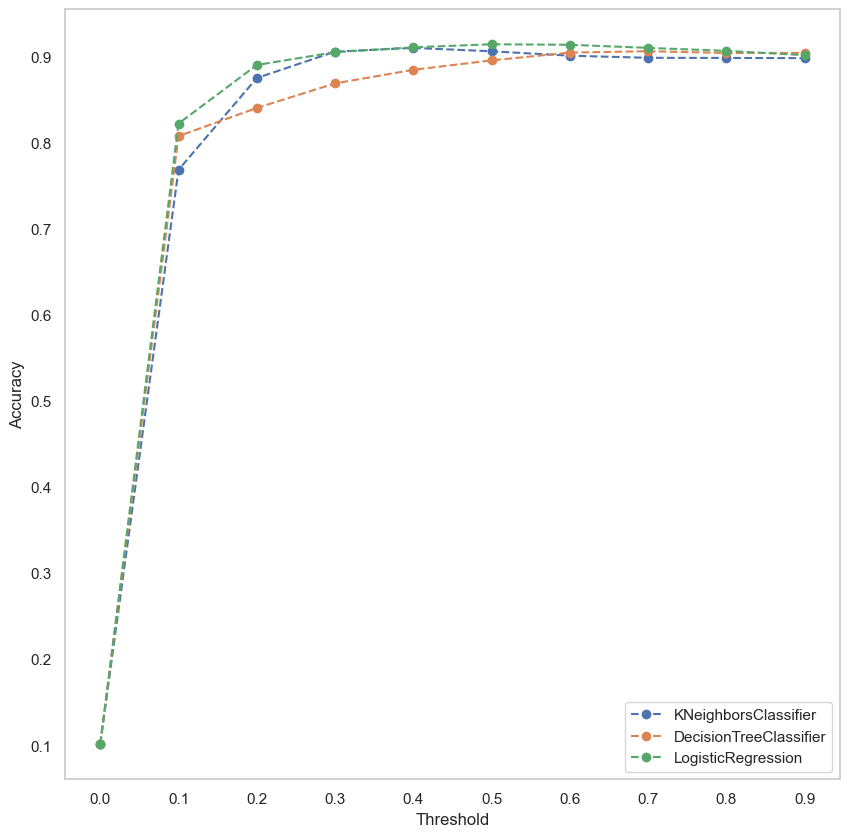

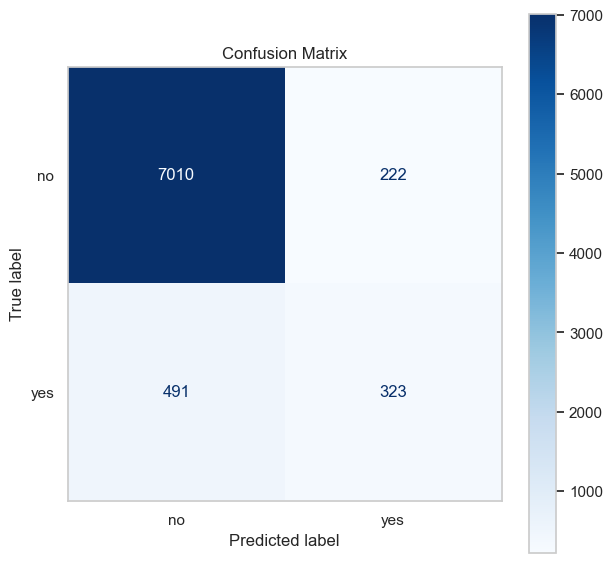

In [79]:
# Get the predicted probabilities
probs = best_lr.predict_proba(X_test_scaled)

# Define the threshold
threshold = 0.4

# Convert probabilities to binary predictions based on the threshold
y_pred_lr2 = (probs[:, 1] >= threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr2)

# Define the display labels
labels = ['no', 'yes']

# Create the ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm, display_labels=labels)

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(7, 7))
cm_display.plot(ax=ax, cmap='Blues', values_format='.0f')  # Add '.0f' to format values as integers

# Set the title
plt.title('Confusion Matrix')

# Remove the grid
plt.grid(False)

# save the plot
plt.savefig('images/lr2_confusion_matrix.png', dpi=300)

# Show the plot
plt.show()


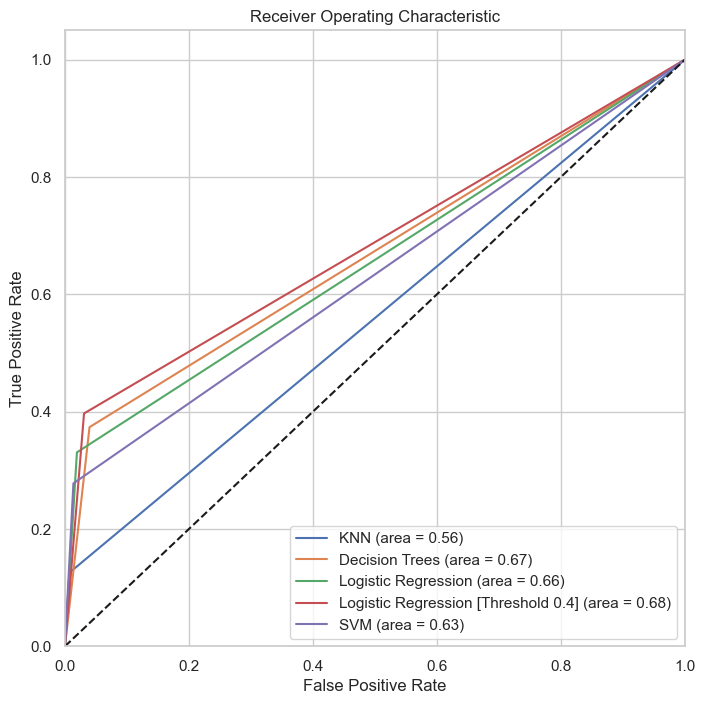

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and ROC area for each model


fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

fpr_lr2, tpr_lr2, _ = roc_curve(y_test, y_pred_lr2)
roc_auc_lr2 = roc_auc_score(y_test, y_pred_lr2)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Plot the ROC curve for each model
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Trees (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lr2, tpr_lr2, label='Logistic Regression [Threshold 0.4] (area = %0.2f)' % roc_auc_lr2)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Feature Importance Analysis

In [81]:
cat_cols = list(preprocessor_scaler.named_transformers_['cat'].get_feature_names_out())
columns = num_vars + cat_cols

In [82]:

feature_importance_lr = pd.DataFrame({'feature': columns, 'importance': best_lr.coef_[0]})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)
feature_importance_lr.head(10)


,feature,importance
45,poutcome_success,1.491169
1,duration,1.040243
11,job_student,0.887010
8,job_retired,0.624126
36,contact_cellular,0.164486
26,education_unknown,0.163427
13,job_unemployed,0.163121
27,default_no,0.142757
23,education_illiterate,0.137693
0,age,0.135619


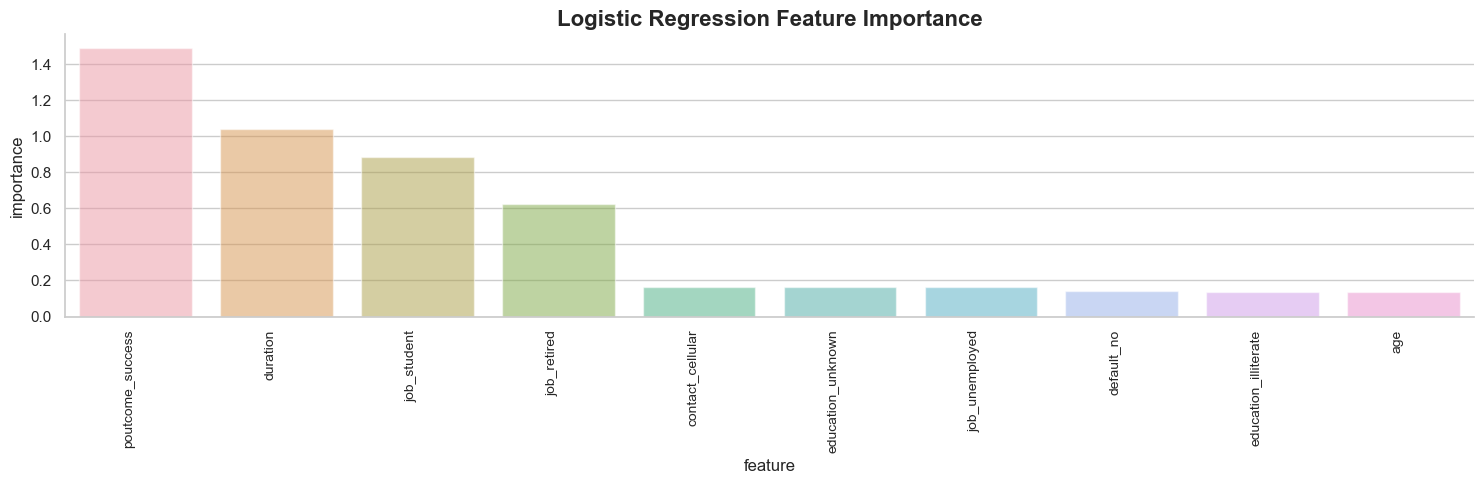

In [83]:
# df, x, y, xlabel, ylabel, title, alpha=0.5, figsize=(15, 5)
plot_bar(feature_importance_lr.head(10), 'feature', 'importance', 'feature', 'importance', 'Logistic Regression Feature Importance')

### Conclusion

$\color{red}{Conclusion}$: The hypothesis is confirmed, when poutcome is sucessful, there's a pretty good chance the value of **Y** will be 'yes'. Duration is also a feature with good predicting value

### Recommendations

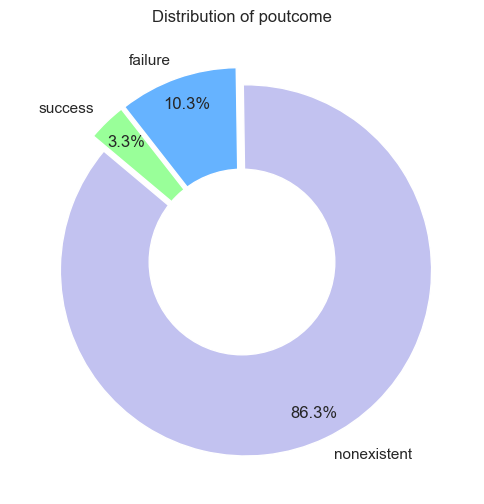

In [84]:
import matplotlib.pyplot as plt

# Calculate value counts
value_counts = encode_y(data)['poutcome'].value_counts(normalize=True)*100

# Define colors as a list
colors = ["#c2c2f0", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode = [0.05]*len(value_counts))

# Draw a white circle at the center to make the pie chart look like a donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Distribution of poutcome', )

# save the plot
plt.savefig('images/distribution_of_poutcome.png', dpi=300)

plt.show()


*thoughts*: 
- Try to improve the quality of the data when it comes to the poutcome. Try to replace 'nonexistent' outcomes with more meaningful ones.
- Since a positive poutcome drives a potential 'yes', create an strategy to widen the scope of marketing campaings so it can cover more client base.
- Explore designing what is called "retargeting" campaings (RT campaigns for short). RT Campaigns are designed for clients that are already aware of your product (via a previous campaign). The goal of RT campaigns is to increase LTV on already engaged clients.